# Junonia Evolution

## phylogenetic tree with z-chromosome

Bombyx mori genome sequence was downloaded from `http://silkbase.ab.a.u-tokyo.ac.jp/pub/Bomo_genome_assembly.fa.gz` 
Another one is from Jiang Zhang, `/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/otherSpecie/Bombyx_mori/silkworm_genome_v2.0.fa.tar.gz`  
Spodoptera litura was downloaded from NCBI  
Junonia coenia was dwonloaded from `http://download.lepbase.org/v4/sequence/Junonia_coenia_JC_v1.0.scaffolds.fa.gz`



### find z-chromosome in Bombyx mori and Heliconius_melpomene

Only the genome of Spodoptera_litura has a clear saying that `NC_036217.1` is the z-chromosome. Based on the literature, Bomo_Chr1 is the z-chromosome, and `Hmel221001o` is the z-chromosome. Double check it.

#### Bombyx mori

run promer  
`/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3 /home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna /home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa`

filter to keep 1to1 best  
`/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.delta.qr`

draw the figure
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.delta.qr`

get coord
`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.delta.qr >/home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.coords.qr`


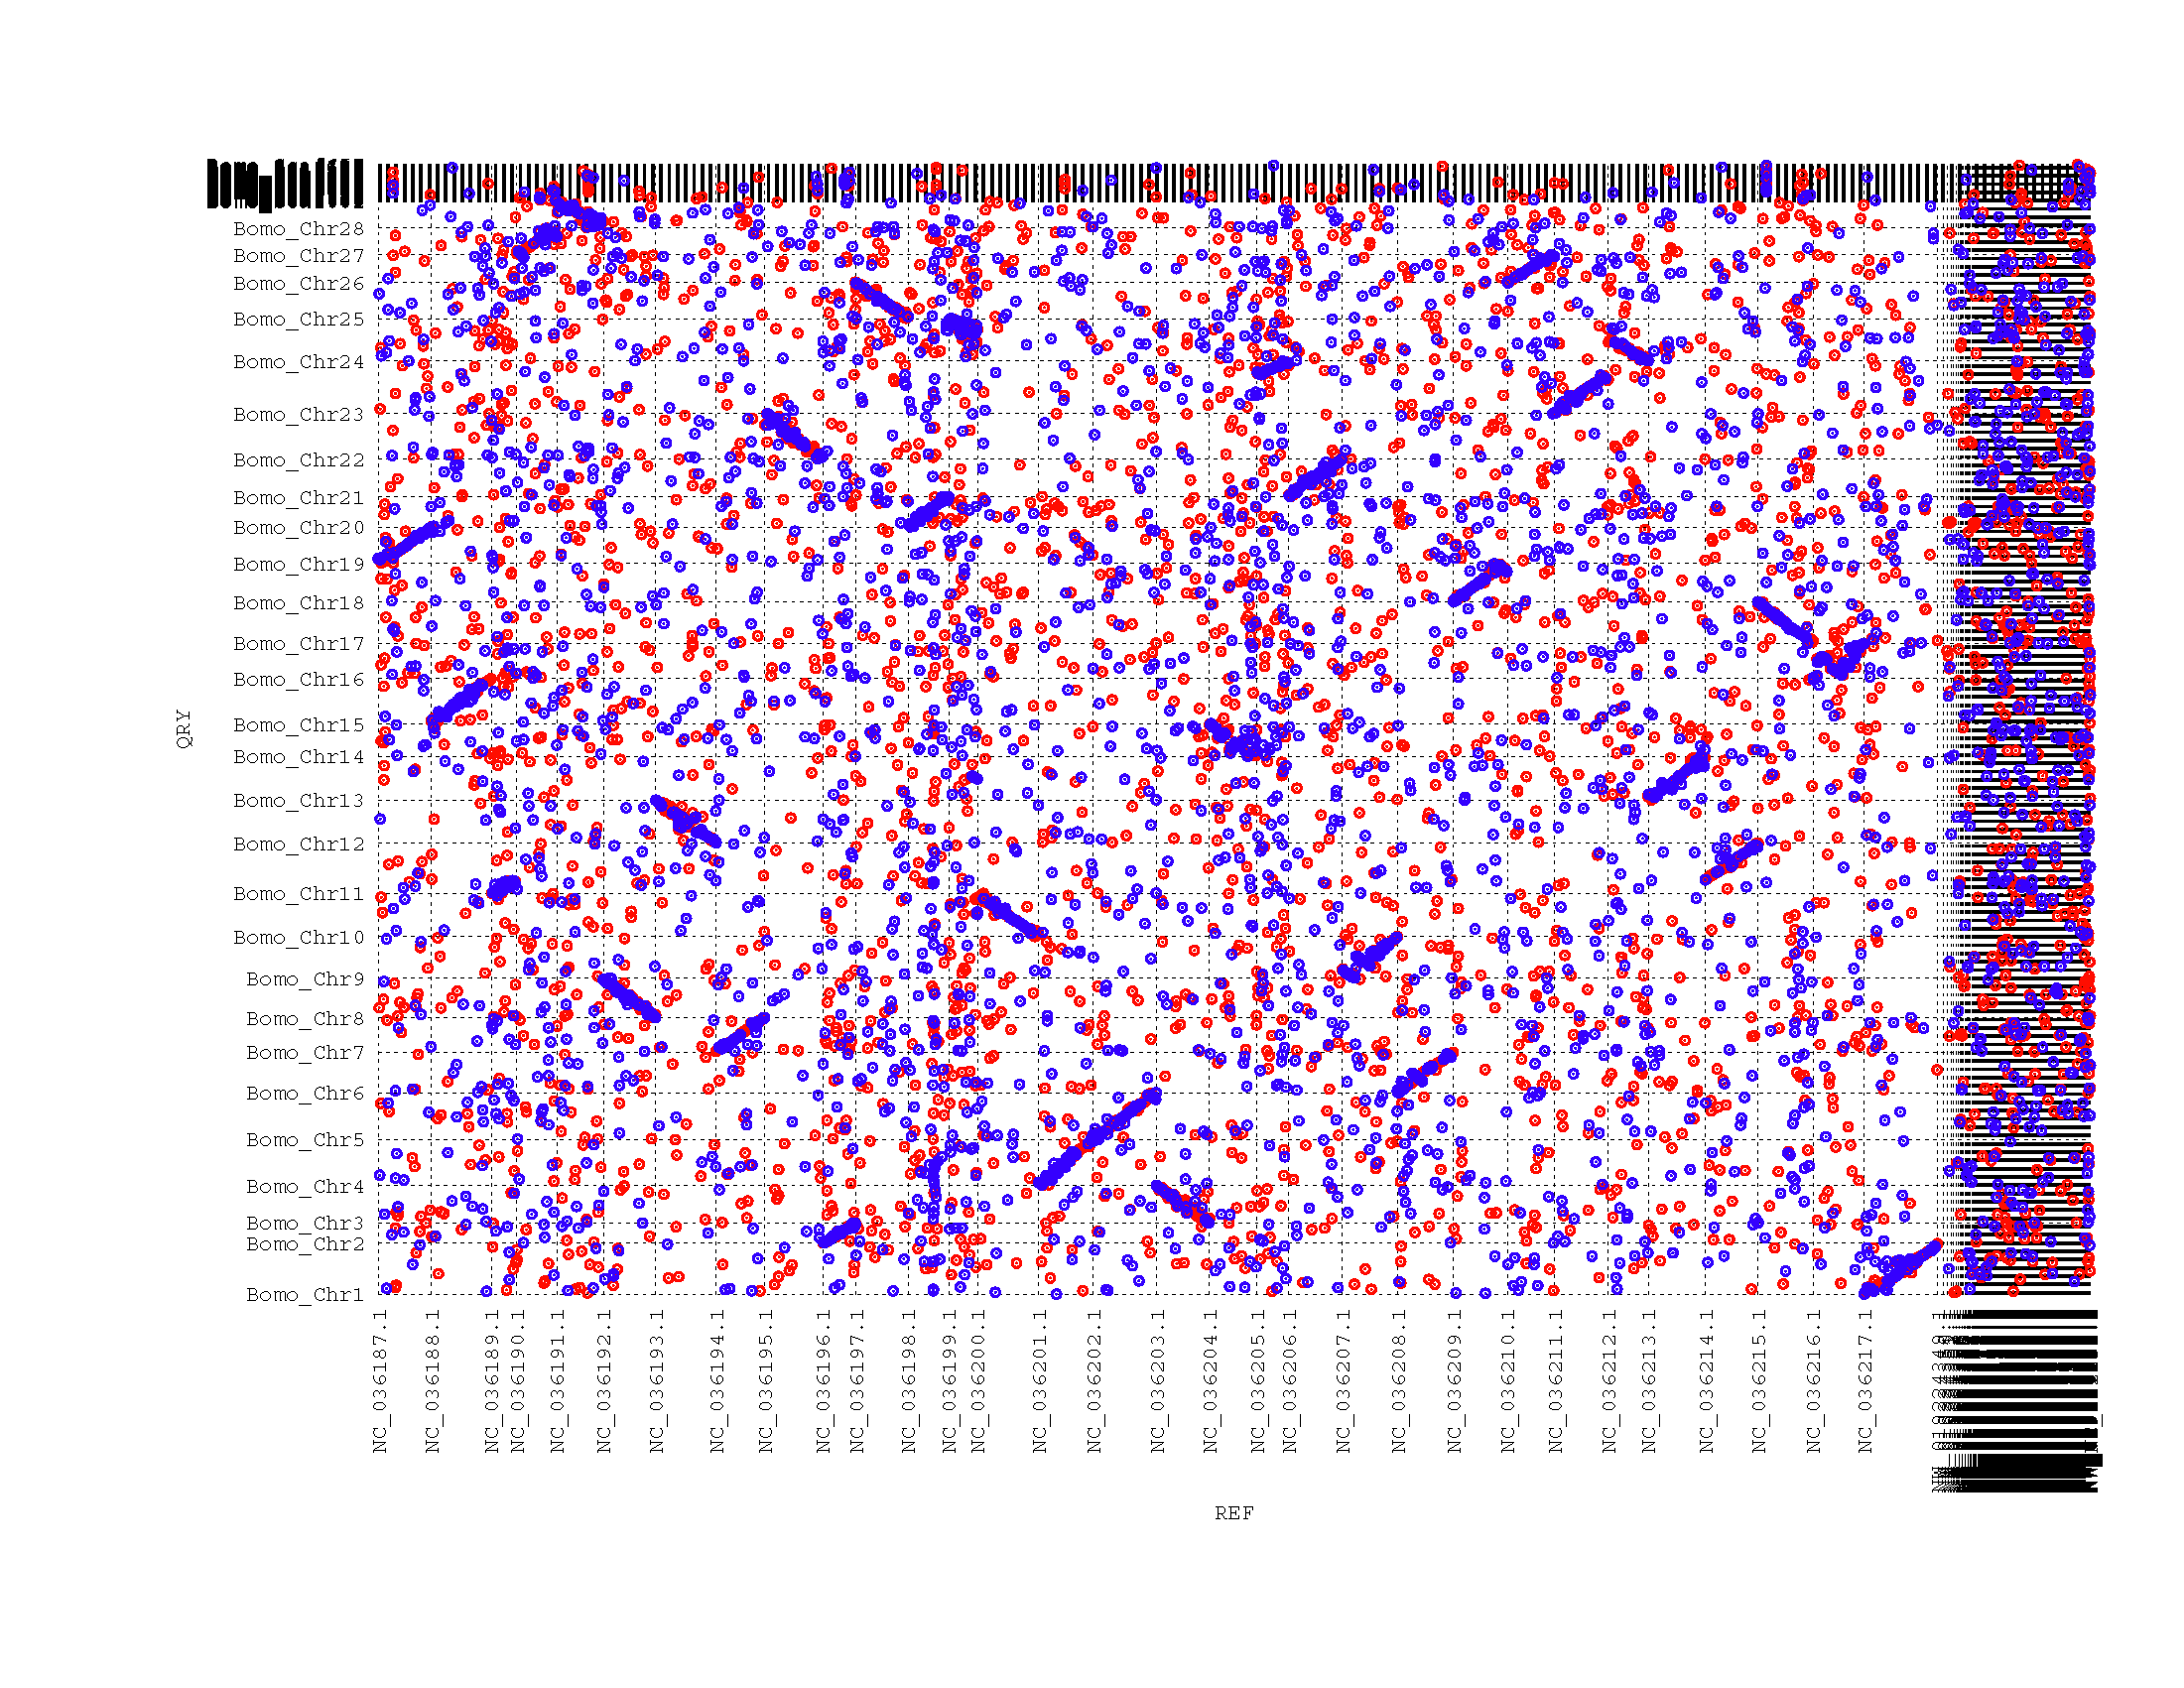

Based on the figure, it is pretty clear that Bomo_Chr1 is chromosome z.

Draw alignment of Bomo_Chr1 and NC_036217.1

```
/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.NC_036217.Bomo_Chr1.promer3 /home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna.NC_036217.1 /home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa.Bomo_Chr1

/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.NC_036217.Bomo_Chr1.promer3 >/home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.NC_036217.Bomo_Chr1.promer3.delta.qr

/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.NC_036217.Bomo_Chr1.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.NC_036217.Bomo_Chr1.promer3.delta.qr
```

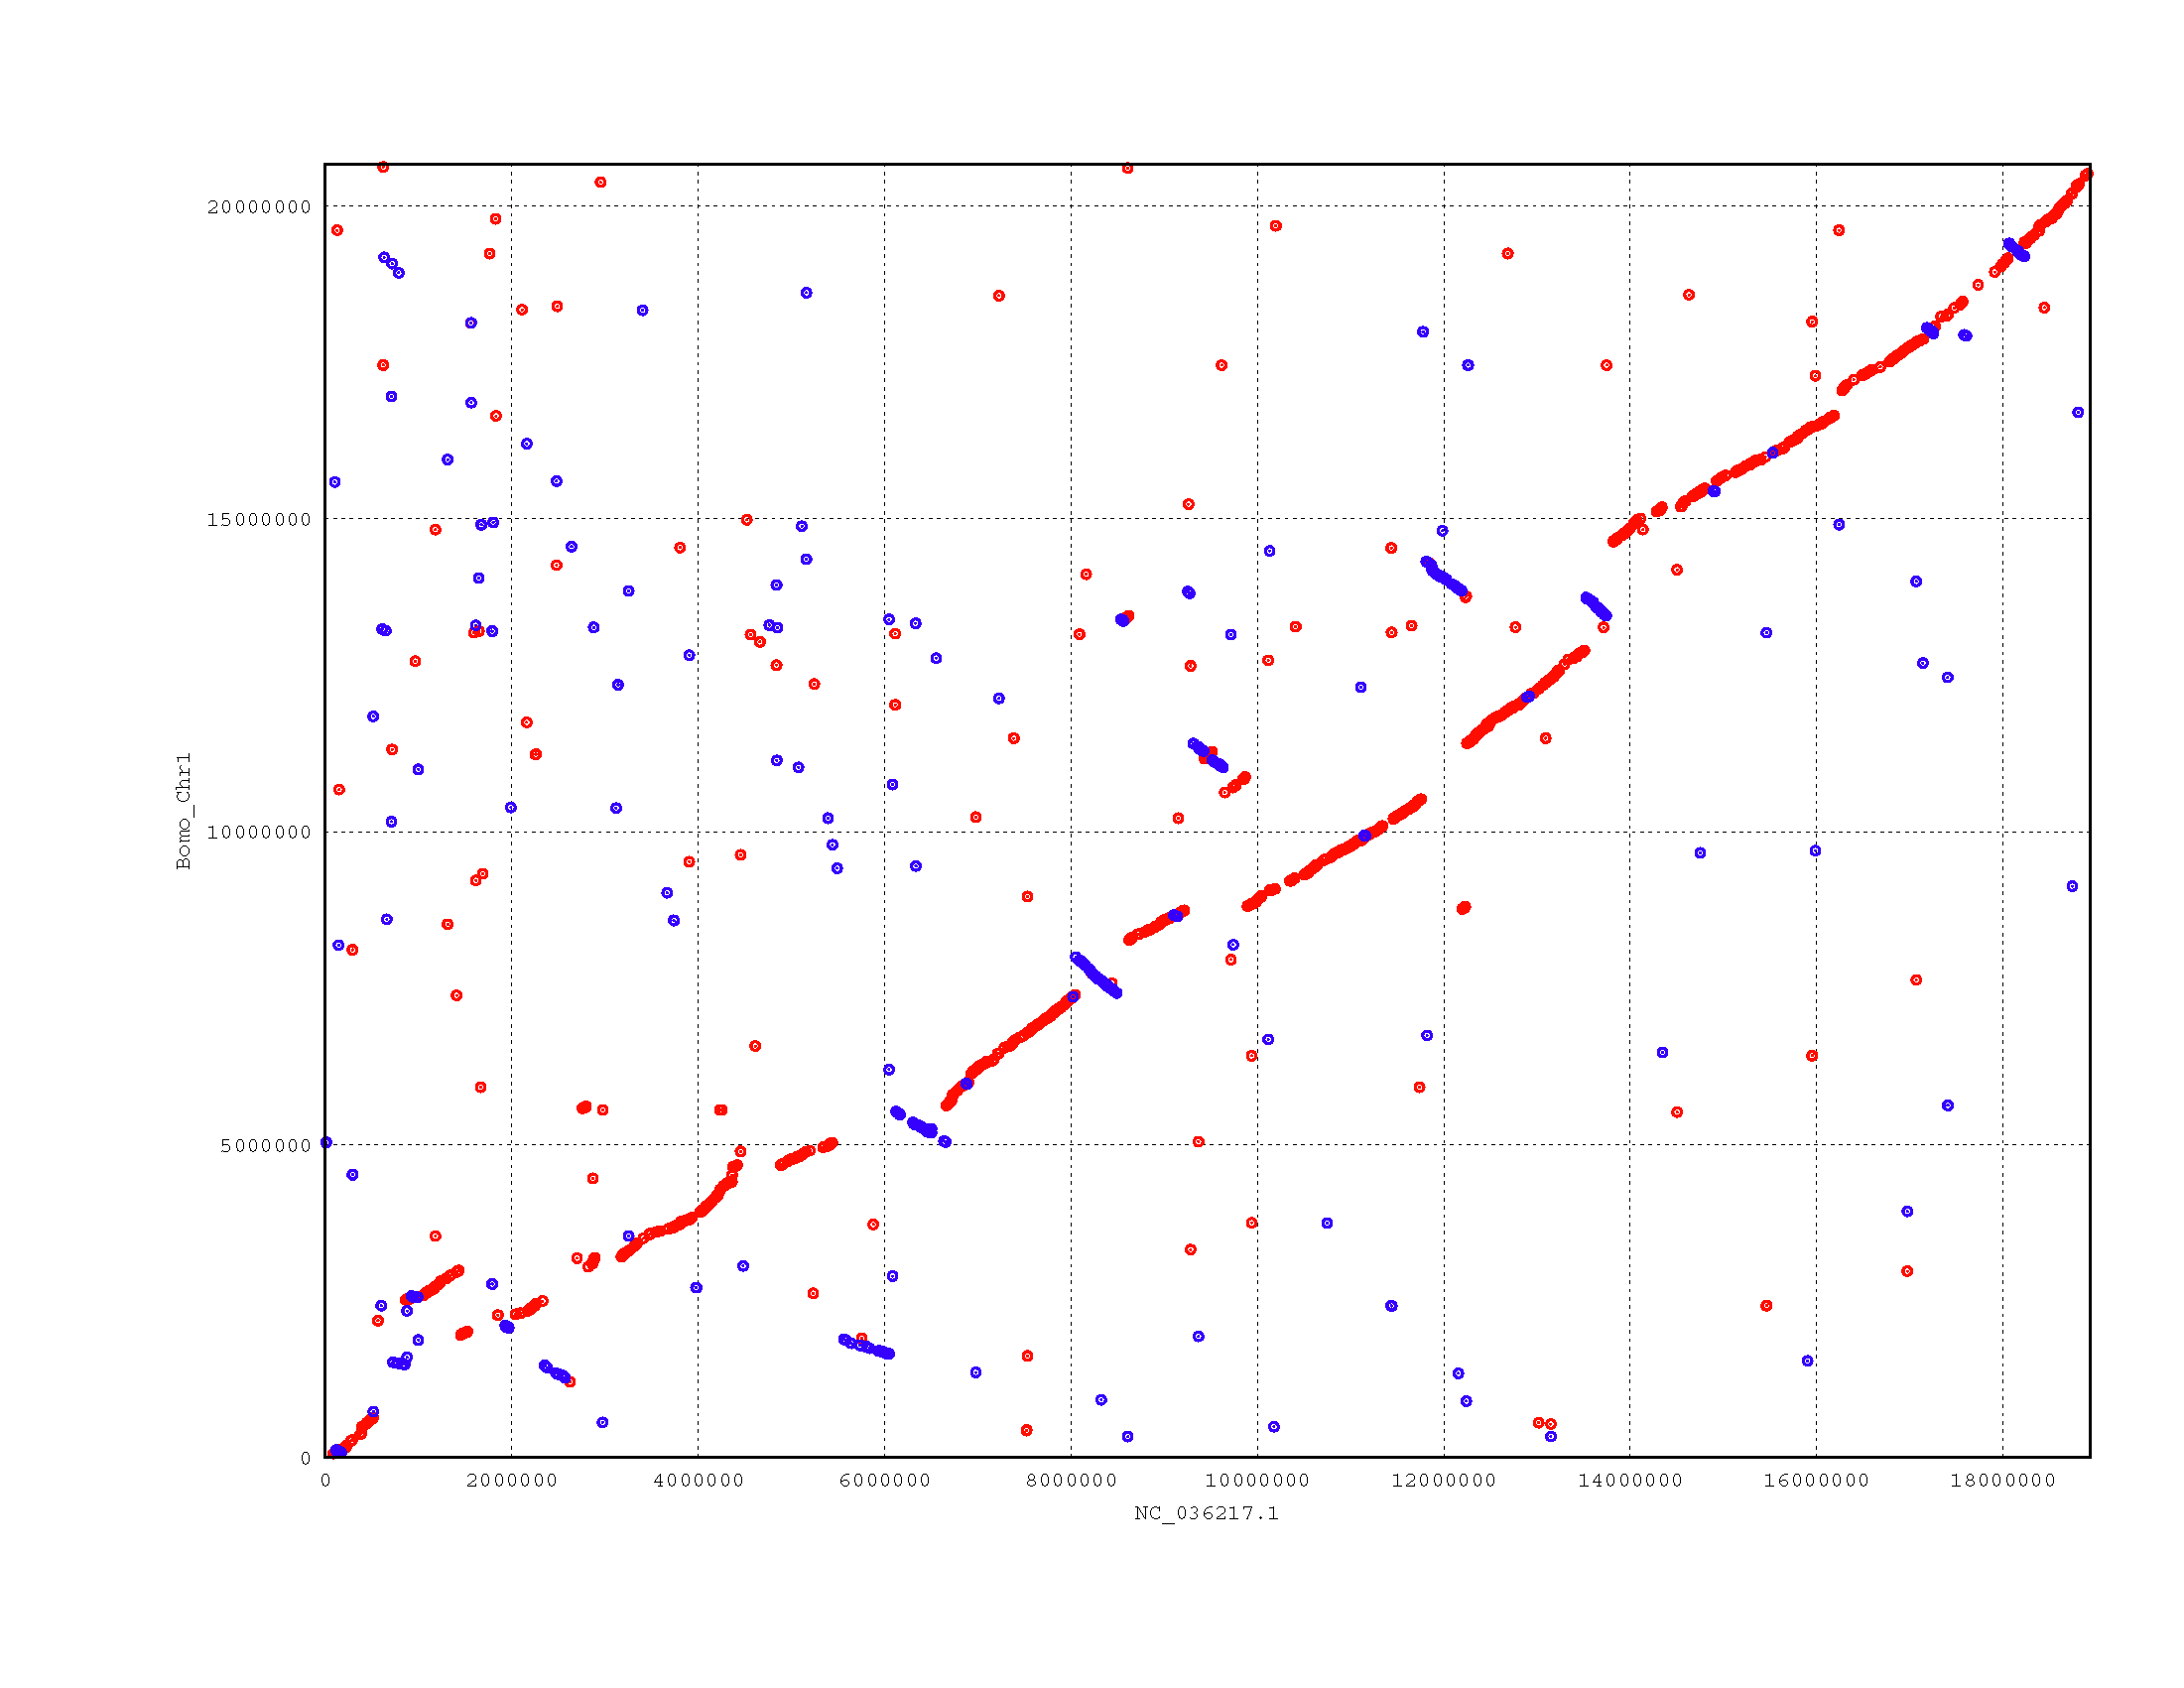

In [101]:
filename_coord = '/home/xcao/w/20180905Junonia_coenia/Bombyx2Spodopetera.promer3.coords.qr'
filename_genome_ref = '/home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna.len'
filename_genome_test = '/home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa.len'
target_chromosome = 'NC_036217.1'
min_ratio_specific = 0.8


filename = filename_coord
l = open(filename).readlines()
ls =[e.split() for e in l[5:]]
import pandas as pd
df = pd.DataFrame(ls)
df2 = df[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20,21,22]].copy()
df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]] = df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]].apply(pd.to_numeric)
df2.columns = ['ref_start','ref_end','query_start','query_end','ref_match_len','query_match_len','identity',\
               'similarity','percent_stop_codon','ref_len','query_len','ref_coverage','query_coverage','ref_reading_frame',\
              'query_reading_frame','ref_id','query_id']
df3 = df2.groupby(['query_id','ref_id'])['ref_match_len'].sum()
l_test2ref_ch = [ [e,df3[e].idxmax(),df3[e].max(),df3[e].sum(), df3[e].max()/df3[e].sum()] for e in df3.index.unique(0)]
df_test2ref_ch = pd.DataFrame(l_test2ref_ch)
filename = filename_genome_test
df_test_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['test_len'])
filename = filename_genome_ref
df_ref_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['ref_len'])
df_test2ref_ch.columns = ['test_id','ref_id','scaffold_match_len','total_match_len','ratio_specific']
df_test2ref_ch1 = df_test2ref_ch.join(df_test_len,how='left',on=['test_id'])
df_test2ref_ch2 = df_test2ref_ch1.join(df_ref_len,how='left',on=['ref_id'])
df_test2ref_ch2_filtered = df_test2ref_ch2[(df_test2ref_ch2['ref_id'] == target_chromosome) &
                          (df_test2ref_ch2['ratio_specific'] >= min_ratio_specific)]
df_test2ref_ch2_filtered

,test_id,ref_id,scaffold_match_len,total_match_len,ratio_specific,test_len,ref_len
0,Bomo_Chr1,NC_036217.1,818004,950124,0.860944,20666287,18934769
117,Bomo_Scaf303,NC_036217.1,189,189,1.000000,17560,18934769


conclusion: Of the matches between Bomo_Chr1 and reference genome, 86% matches to z-chromosome of reference.

#### Heliconius melpomene

`/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3 /home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna /home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa`

filter to keep 1to1 best  
`/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.delta.qr`

draw the figure
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.delta.qr`

get coord
`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.delta.qr >/home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.coords.qr`

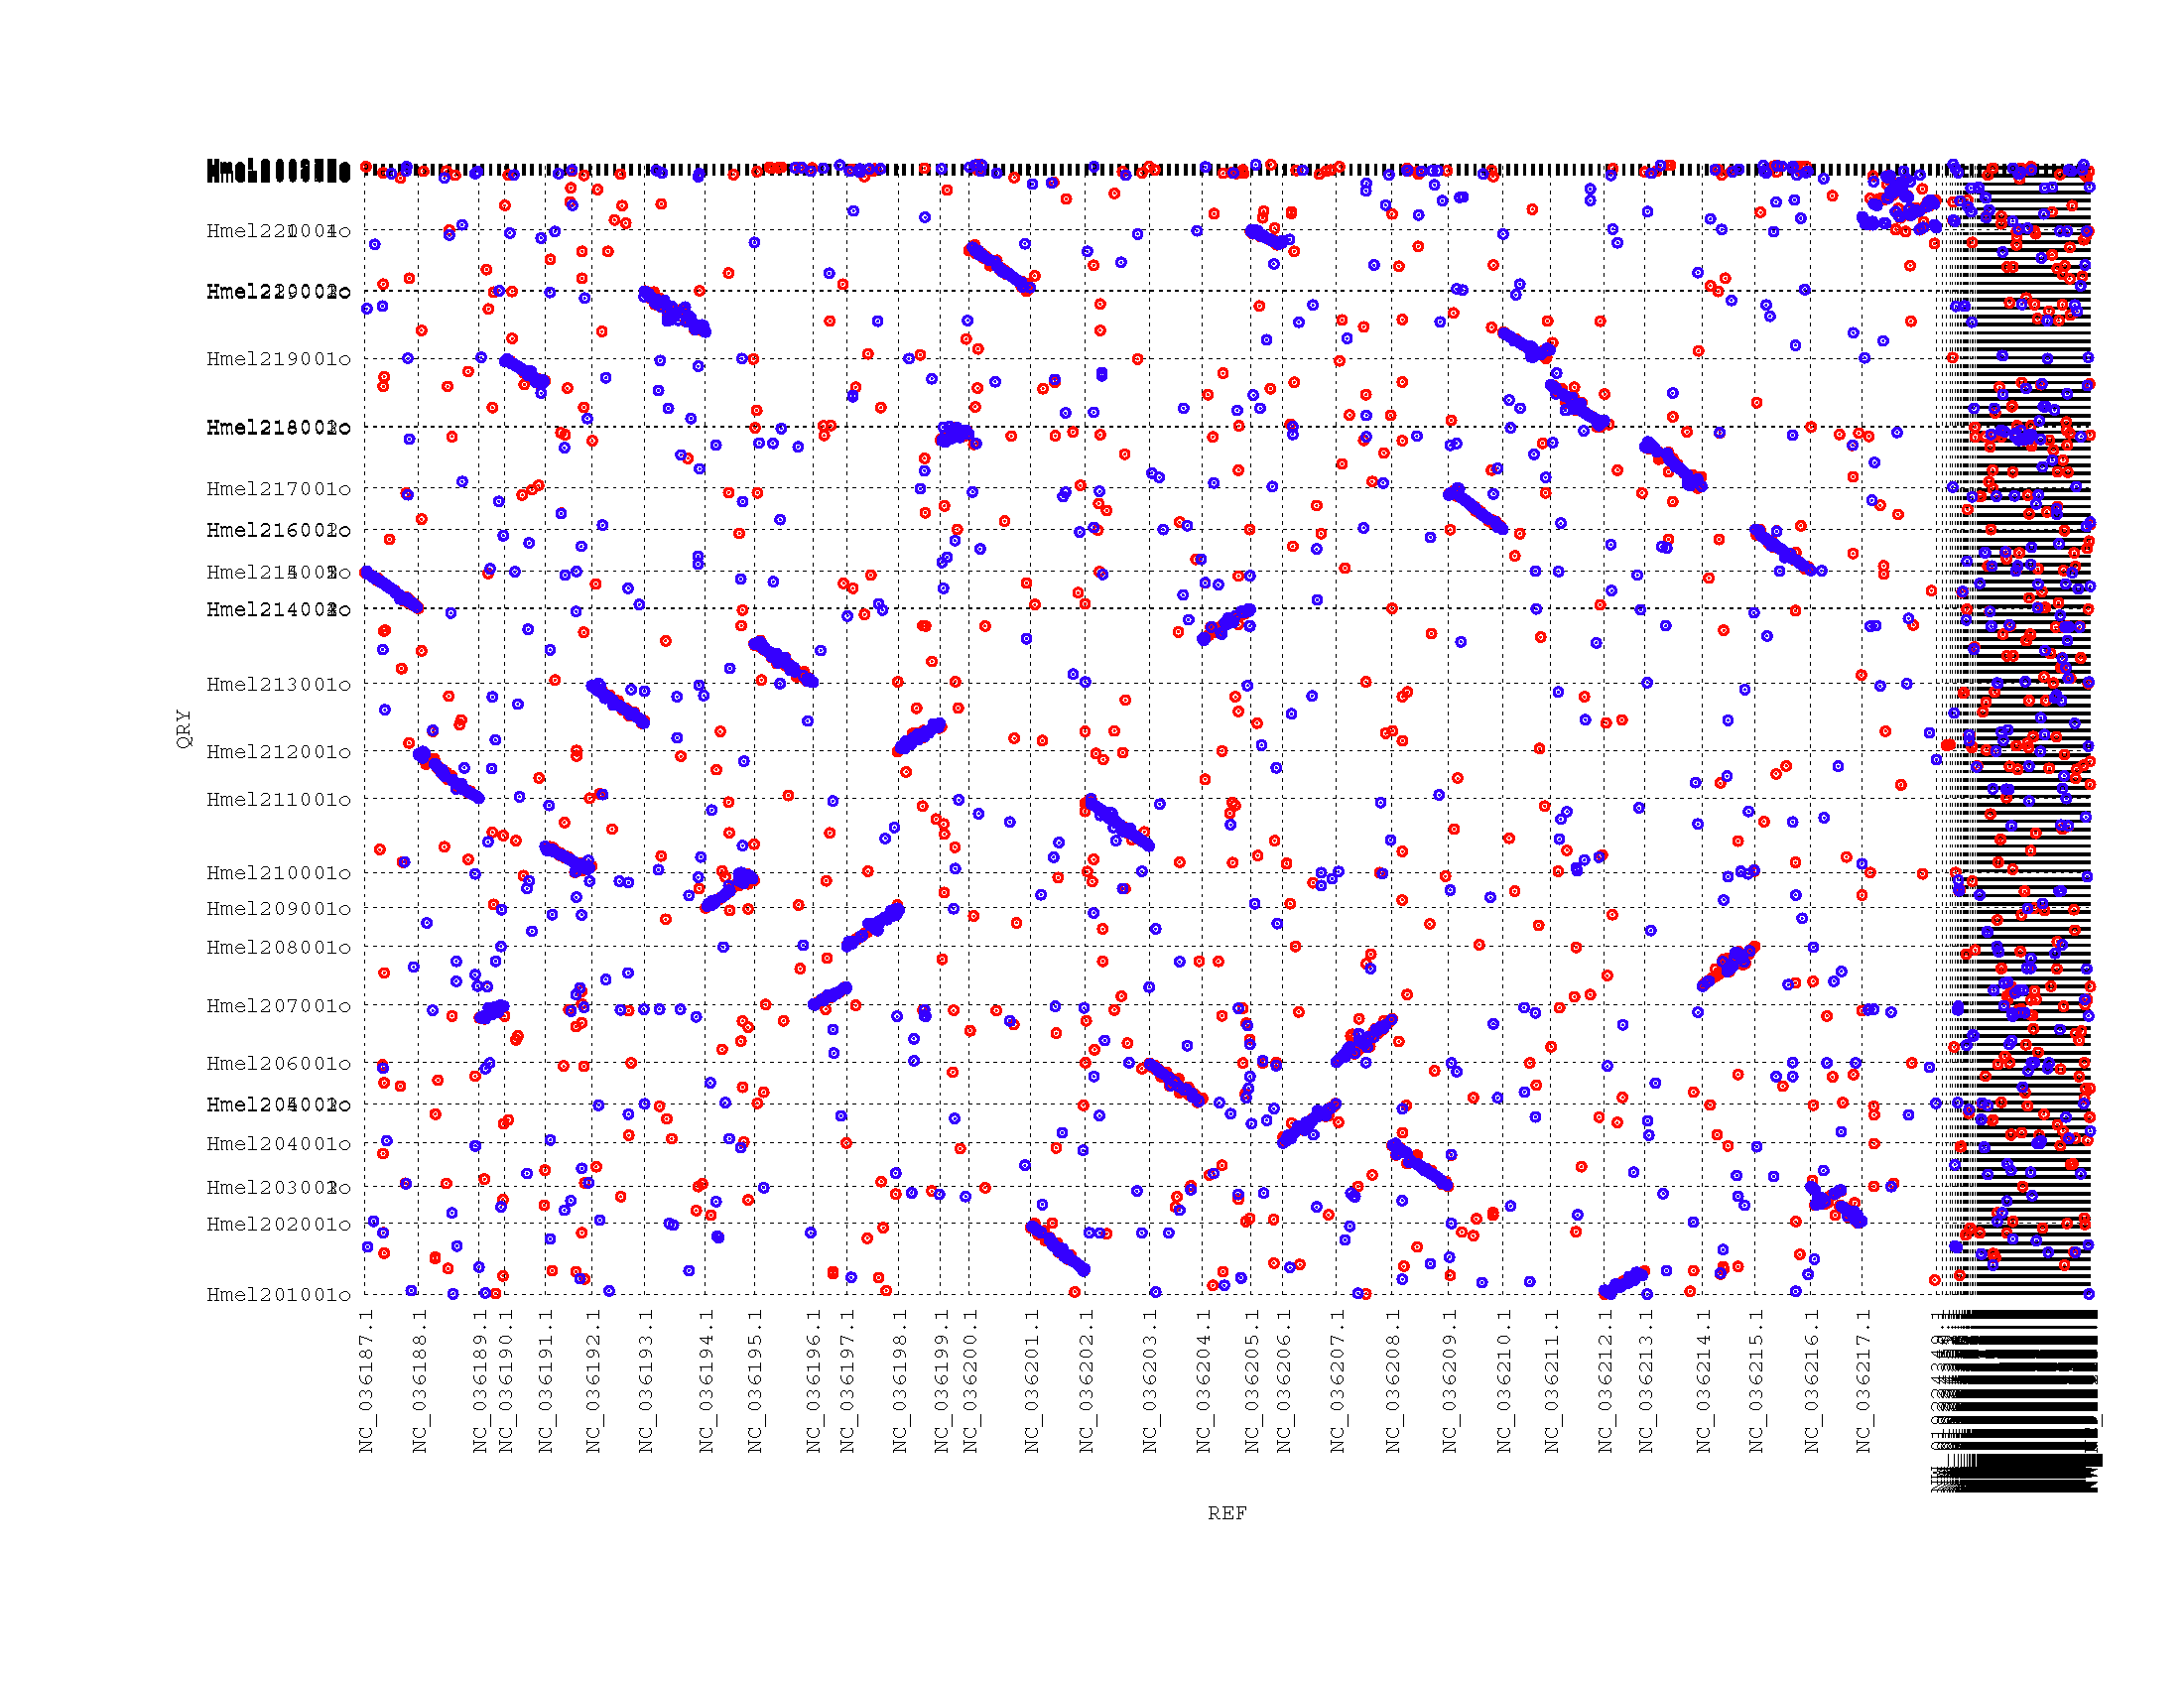

Based on the figure, it is pretty clear that Hmel221001o is chromosome z.

Draw alignment of Hmel221001o and NC_036217.1

```
/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.NC_036217.Hmel221001o.promer3 /home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna.NC_036217.1 /home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa.Hmel221001o

/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.NC_036217.Hmel221001o.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.NC_036217.Hmel221001o.promer3.delta.qr

/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.NC_036217.Hmel221001o.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.NC_036217.Hmel221001o.promer3.delta.qr
```
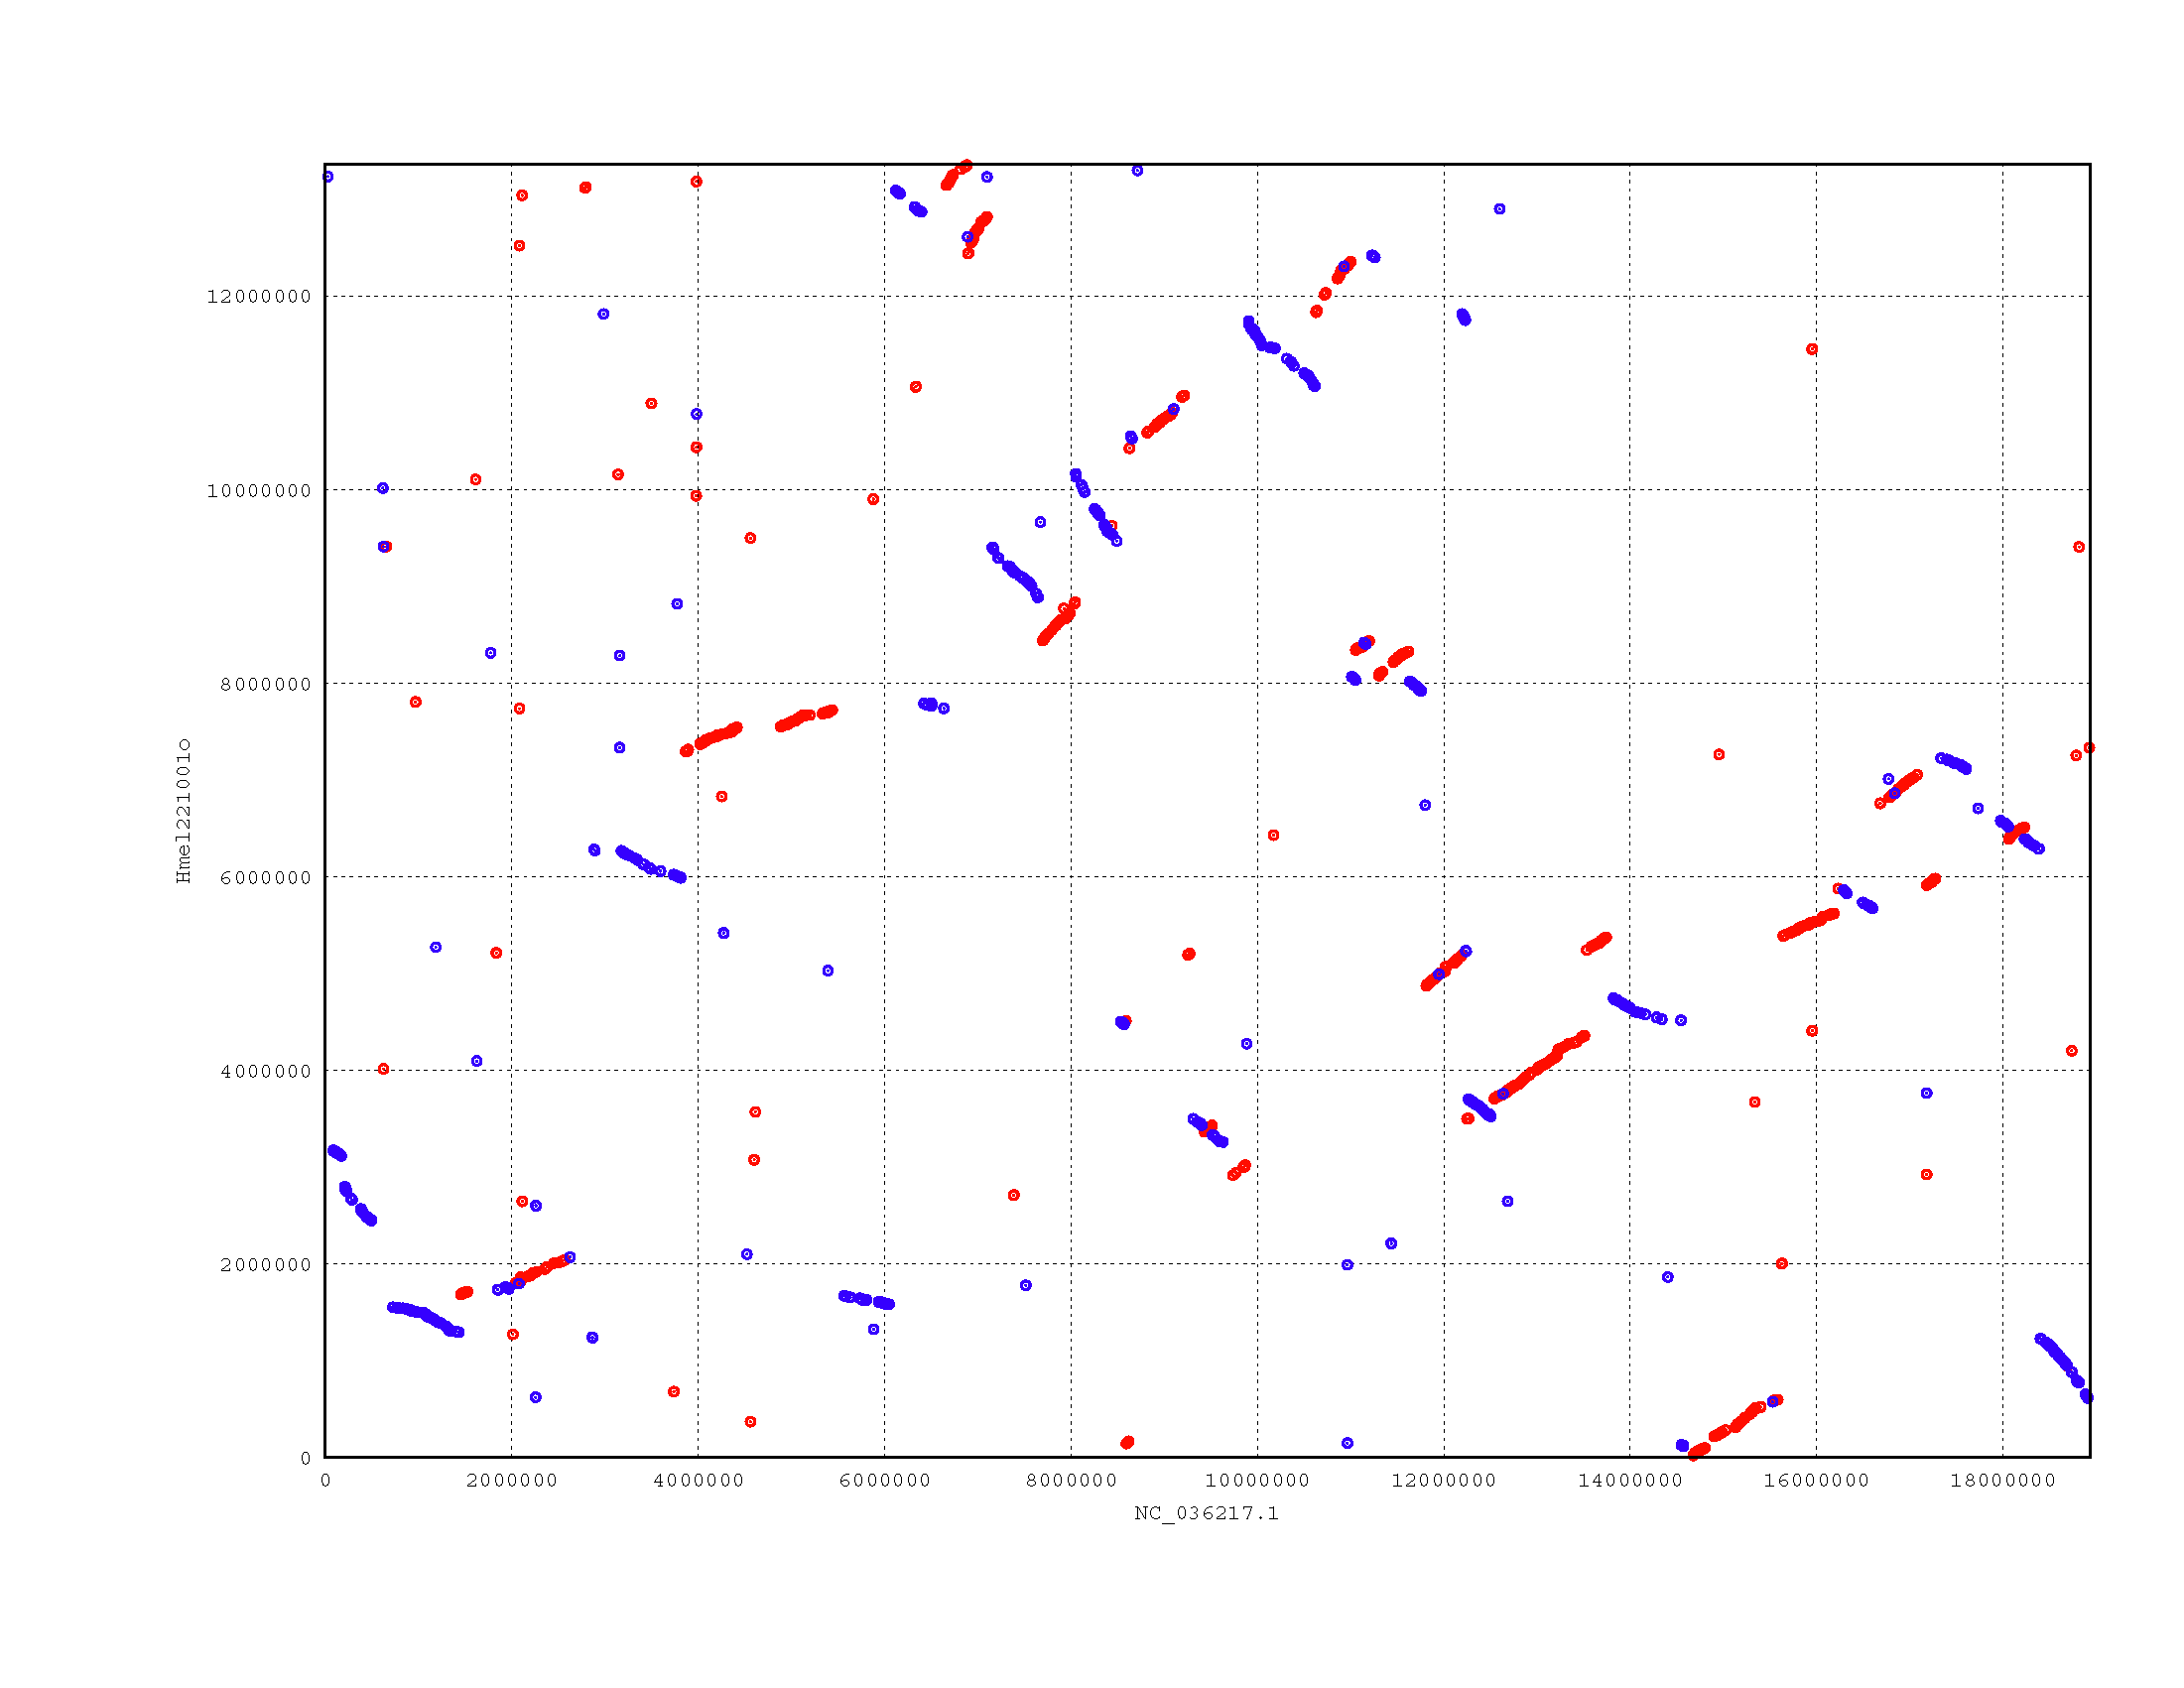


In [103]:
filename_coord = '/home/xcao/w/20180905Junonia_coenia/Heliconius2Spodopetera.promer3.coords.qr'
filename_genome_ref = '/home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna.len'
filename_genome_test = '/home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa.len'
target_chromosome = 'NC_036217.1'
min_ratio_specific = 0.8


filename = filename_coord
l = open(filename).readlines()
ls =[e.split() for e in l[5:]]
import pandas as pd
df = pd.DataFrame(ls)
df2 = df[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20,21,22]].copy()
df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]] = df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]].apply(pd.to_numeric)
df2.columns = ['ref_start','ref_end','query_start','query_end','ref_match_len','query_match_len','identity',\
               'similarity','percent_stop_codon','ref_len','query_len','ref_coverage','query_coverage','ref_reading_frame',\
              'query_reading_frame','ref_id','query_id']
df3 = df2.groupby(['query_id','ref_id'])['ref_match_len'].sum()
l_test2ref_ch = [ [e,df3[e].idxmax(),df3[e].max(),df3[e].sum(), df3[e].max()/df3[e].sum()] for e in df3.index.unique(0)]
df_test2ref_ch = pd.DataFrame(l_test2ref_ch)
filename = filename_genome_test
df_test_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['test_len'])
filename = filename_genome_ref
df_ref_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['ref_len'])
df_test2ref_ch.columns = ['test_id','ref_id','scaffold_match_len','total_match_len','ratio_specific']
df_test2ref_ch1 = df_test2ref_ch.join(df_test_len,how='left',on=['test_id'])
df_test2ref_ch2 = df_test2ref_ch1.join(df_ref_len,how='left',on=['ref_id'])
df_test2ref_ch2_filtered = df_test2ref_ch2[(df_test2ref_ch2['ref_id'] == target_chromosome) &
                          (df_test2ref_ch2['ratio_specific'] >= min_ratio_specific)]
df_test2ref_ch2_filtered

,test_id,ref_id,scaffold_match_len,total_match_len,ratio_specific,test_len,ref_len
34,Hmel200119o,NC_036217.1,573,573,1.000000,2599,18934769
142,Hmel221001o,NC_036217.1,701694,796875,0.880557,13359691,18934769


conclusion: Of the matches between Hmel221001o and reference genome, 88% matches to z-chromosome of reference.

### find genome regions of Junonia of z-chromosome

#### run mummer to compare the genome of Junonia_coenia and Bombyx mori

`/home/xcao/p/mummer/mummer-4.0.0beta2build/bin/nucmer -t 32 --maxgap=5000 --mincluster=100 -p /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.mummer /home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa /home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa `

visualize the result
`/home/xcao/p/mummer/mummer-4.0.0beta2build/bin/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.mummer.delta -p /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.mummer`

I cannot tell anything from the plot. Thre is a lot of tiny alignements.


#### run promer to compare the genome of Junonia_coenia and Bombyx mori


the mummer 4.0 promer cannot run well. use the 3.23 version
`/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3 /home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa /home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa`

`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.coords`

filter the .delta file to only include 1to1 best match.
`/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr`

coords of filtered .delta file
`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr >/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.coords.qr`

draw the fiugre
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr`
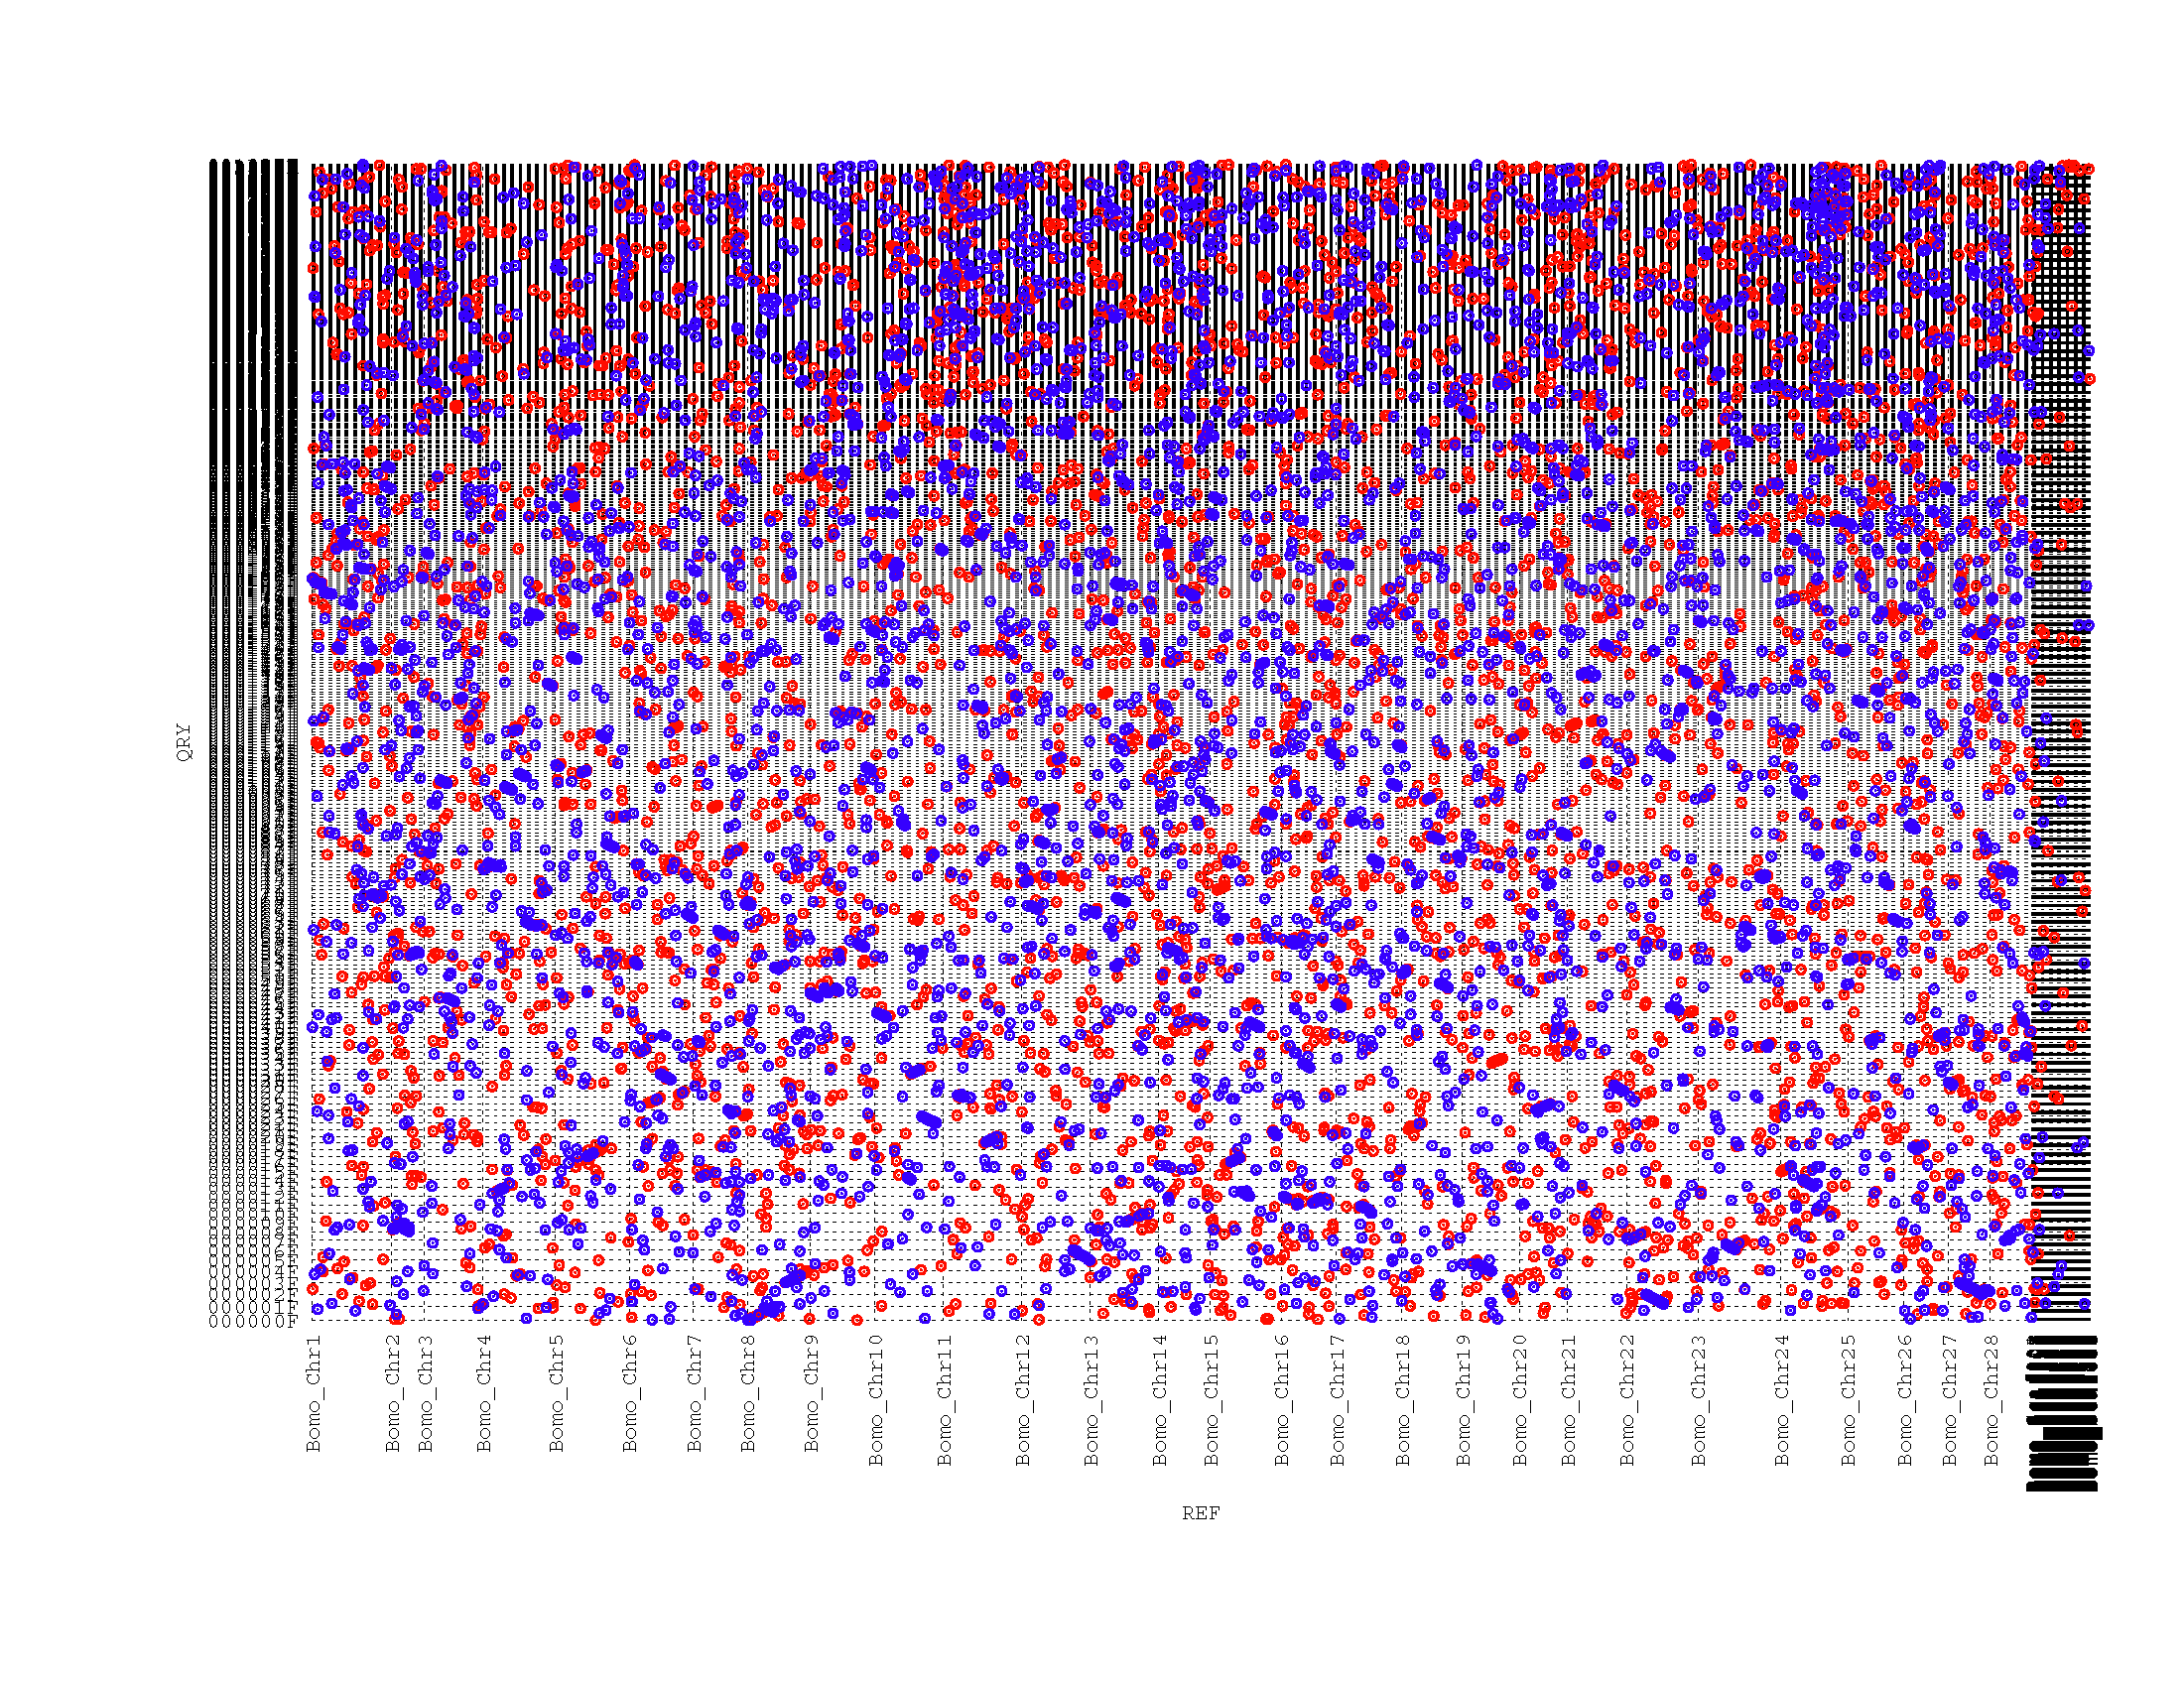

In [20]:
chromosome_name = 'Bomo_Chr1'
genome_file = '/home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa'
from Bio import SeqIO
for e in SeqIO.parse(genome_file,'fasta'):
    if e.id == chromosome_name:
        open(genome_file+'.'+chromosome_name,'w').write('>'+e.id+'\n'+str(e.seq)+'\n')
fout = open('/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr.Bomo_Chr1','w')
l = open('/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr').readlines()
fout.write(l[0].replace(genome_file,genome_file+'.'+chromosome_name))
fout.write(l[1])
n = 2
while n < len(l):
    e = l[n]
    if e[0] == '>':
        if 'Bomo_Chr1' in e[1:].split():
            fout.write(e)
            n += 1
            e = l[n]
            while e[0] != '>':
                fout.write(e)
                n += 1
                e = l[n]
        else:
            n += 1
    else:
        n += 1
fout.close()

draw the figure, only with Bomo_Chr1
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr.Bomo_Chr1 -t postscript -p /home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.delta.qr.Bomo_Chr1
`

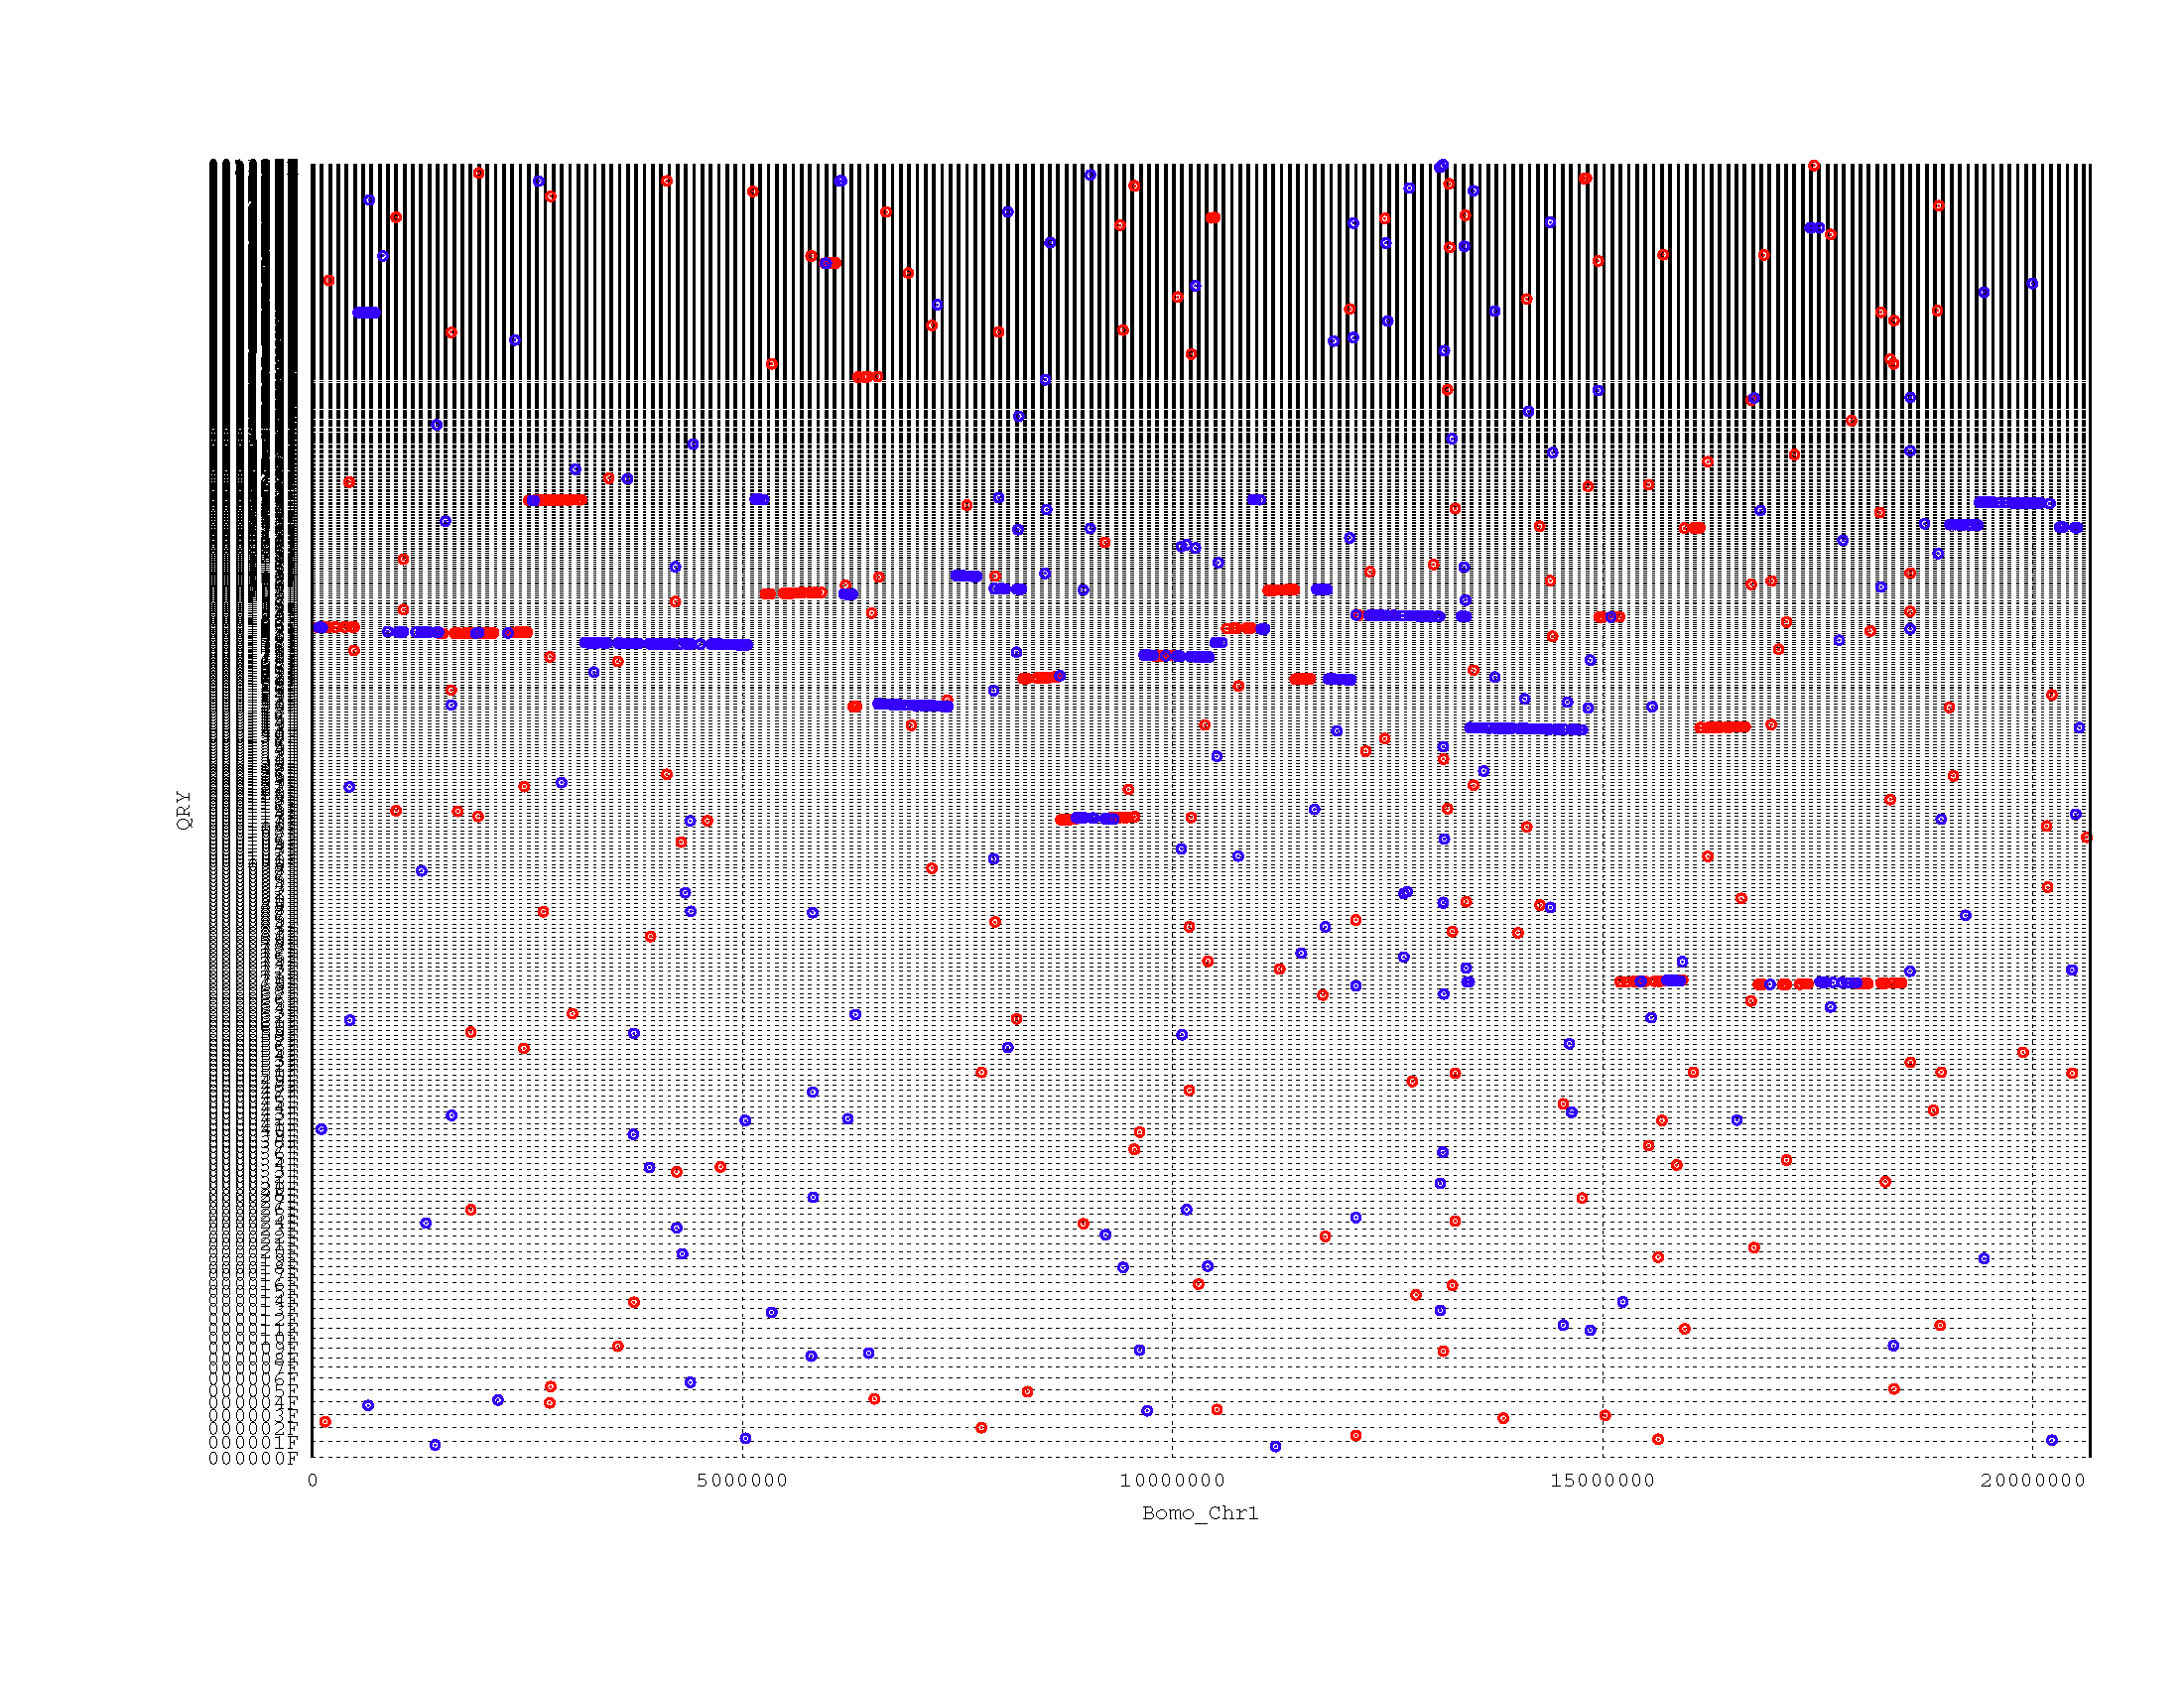

It is clear that some scaffolds can align well with `Bomo_Chr1`, the z-chromosome.

#### Get some information from the bombyx genome. 

In [1]:
from Bio import SeqIO
fout = open('/home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa.head','w')
for _e in SeqIO.parse('/home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa','fasta'):
    fout.write(_e.description+'\n')
fout.close()

In [2]:
from Bio import SeqIO
fout = open('/home/xcao/w/genomes/Bombyx_mori/silkgenome.fa.head','w')
for _e in SeqIO.parse('/home/xcao/w/genomes/Bombyx_mori/silkgenome.fa','fasta'):
    fout.write(_e.description+'\n')
fout.close()

In [13]:
from Bio import SeqIO
fout = open('/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.head','w')
for _e in SeqIO.parse('/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa','fasta'):
    fout.write(_e.description+'\n')
fout.close()

In [15]:
files = ['/home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa',
         '/home/xcao/w/genomes/Bombyx_mori/silkgenome.fa',
         '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa']
for _f in files:
    fout = open(_f+'.len','w')
    for _e in SeqIO.parse(_f,'fasta'):
        fout.write(_e.id+'\t'+str(len(_e.seq))+'\n')
    fout.close()

Based on the literature, chromosome 1 is the z-chromosome of Bombyx mori
 `https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2691758/`, `The Silkworm Z Chromosome Is Enriched in Testis-Specific Genes
`

Of the two genome sequence of Bombyx mori, the newer one `Bomo_genome_assembly.fa` is assemblied to chromosome level and with totally 696 genome fragments. Use this one.


In [17]:
#rename scaffolds of junonia_coenia
from Bio import SeqIO
fout = open('/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds_rename.fa','w')
n=1
for _e in SeqIO.parse('/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa','fasta'):
    fout.write('>jc'+'%04d'%n+'\n'+str(_e.seq)+'\n')
    n += 1
fout.close()

#### understand the output of nucmer. The `.delta` file

```
-- OUTPUT FILES --

 *** .delta OUTPUT ***

   This output file is a representation of the all-vs-all alignment between
the sequences contained in the multi-FASTA input files. It catalogs the
coordinates of aligned regions and the distance between insertions and deletions
contained in these alignment regions. The first two lines of the file are
identical to the .cluster output. The first line lists the two original input
files separated by a space, and the second line specifies the alignment data
type, either "NUCMER" or "PROMER". Every grouping of alignment regions have
a header, just like the cluster's header in the .cluster file. This is a FASTA
style header and lists the two sequences that produced the following alignments
after a '>' and separated by a space, after the two sequences are the lengths
of those sequences in the same order. An example header might look like:

>tagA1 tagB1 500 2000000

   Following this sequence header is the alignment data. Each alignment region
has a header that describes the start and end coordinates of the alignment in
each sequence. These coordinates are inclusive and reference the forward strand
of the current sequence. Thus, if the start coordinate is greater than the end
coordinate, the alignment is on the reverse strand. The four digits are the
start and end in the reference sequence respectively and the start and end in
the query sequence respectively. These coordinates are always measured in DNA
bases regardless of the alignment data type. The three digits after the starts
and stops are the number of errors (non-identities), similarity errors (non-
positive match scores) and non-alpha characters in the sequence (used to count
stop-codons i promer data). An example header might look like:

5198 22885 5389 23089 20 20 0

   Each of these headers is followed by a string of signed digits, one per line,
with the final line before the next header equaling 0 (zero). Each digit
represents the distance to the next insertion in the reference (positive int)
or deletion in the reference (negative int), as measured in DNA bases or amino
acids depending on the alignment data type. For example, with 'nucmer' the
delta sequence (1, -3, 4, 0) would represent an insertion at positions 1 and 7
in the reference sequence and an insertion at position 3 in the query sequence.
Or with letters:

A = acgtagctgag$
B = cggtagtgag$
Delta = (1, -3, 4, 0)
A = acg.tagctgag$
B = .cggtag.tgag$
```

#### extract info from `.coords` file

`/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.coords.qr` stores the non-overlab unique matches between query and reference genome. 
```
    [S1]     [E1]  |     [S2]     [E2]  |  [LEN 1]  [LEN 2]  |  [% IDY]  [% SIM]  [% STP]  |  [LEN R]  [LEN Q]  |  [COV R]  [COV Q]  | [FRM]  [TAGS]
 ========================================================================================================================================================
    2540     2806  |     3216     3473  |      267      258  |    46.67    50.00     2.78  | 20302755     8916  |     0.00     2.89  |  2  3  2R    3211358
    2540     2806  |     1939     2196  |      267      258  |    46.67    51.11     2.22  | 20302755     2375  |     0.00    10.86  |  2  1  2R    3211430
    2540     2893  |    20172    19852  |      354      321  |    39.52    45.16     3.23  | 20302755    25647  |     0.00     1.25  |  2 -1  2R    3215406
    2806     2534  |     5291     5536  |      273      246  |    41.94    47.31     3.76  | 20302755    12414  |     0.00     1.98  | -3  2  2R    3211507
```

> Output is to stdout and is slightly different depending on the type of alignment, i.e. nucleotide or amino acid. Some of the described columns, such as percent similarity, will not appear for nucleotide comparisons. When run without the -H or -B options, show-coords prints a header tag for each column; the descriptions of each tag follows. [S1] start of the alignment region in the reference sequence [E1] end of the alignment region in the reference sequence [S2] start of the alignment region in the query sequence [E2] end of the alignment region in the query sequence [LEN 1] length of the alignment region in the reference sequence [LEN 2] length of the alignment region in the query sequence [% IDY] percent identity of the alignment [% SIM] percent similarity of the alignment (as determined by the BLOSUM scoring matrix) [% STP] percent of stop codons in the alignment [LEN R] length of the reference sequence [LEN Q] length of the query sequence [COV R] percent alignment coverage in the reference sequence [COV Q] percent alignment coverage in the query sequence [FRM] reading frame for the reference and query sequence alignments respectively [TAGS] the reference and query FastA IDs respectively. All output coordinates and lengths are relative to the forward strand of the reference DNA sequence.

> When run with the -B option, output format will consist of 21 tab-delimited columns. These are as follows: [1] query sequence ID [2] date of alignment [3] length of query sequence [4] alignment type [5] reference file [6] reference sequence ID [7] start of alignment in the query [8] end of alignment in the query [9] start of alignment in the reference [10] end of alignment in the reference [11] percent identity [12] percent similarity [13] length of alignment in the query [14] 0 for compatibility [15] 0 for compatibility [16] NULL for compatibility [17] 0 for compatibility [18] strand of the query [19] length of the reference sequence [20] 0 for compatibility [21] and 0 for compatibility.



In [115]:
filename = '/home/xcao/w/20180905Junonia_coenia/Junonia2Bombyx.promer3.coords.qr'
l = open(filename).readlines()
ls =[e.split() for e in l[5:]]
import pandas as pd
df = pd.DataFrame(ls)
df2 = df[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20,21,22]].copy()
df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]] = df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]].apply(pd.to_numeric)
df2.columns = ['ref_start','ref_end','query_start','query_end','ref_match_len','query_match_len','identity',\
               'similarity','percent_stop_codon','ref_len','query_len','ref_coverage','query_coverage','ref_reading_frame',\
              'query_reading_frame','ref_id','query_id']
df3 = df2.groupby(['query_id','ref_id'])['ref_match_len'].sum()
l_junonia2bombyx_ch = [ [e,df3[e].idxmax(),df3[e].max(),df3[e].sum(), df3[e].max()/df3[e].sum()] for e in df3.index.unique(0)]
df_junonia2bombyx_ch = pd.DataFrame(l_junonia2bombyx_ch)

In [116]:
filename = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'
df_jun_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['junonia_len'])
filename = '/home/xcao/w/genomes/Bombyx_mori/Bomo_genome_assembly.fa.len'
df_bombyx_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['bombyx_len'])
df_junonia2bombyx_ch.columns = ['junonia_id','bombyx_id','scaffold_match_len','total_match_len','ratio_specific']

In [117]:
df_junonia2bombyx_ch.head()

,junonia_id,bombyx_id,scaffold_match_len,total_match_len,ratio_specific
0,000000F,Bomo_Chr8,197445,220422,0.895759
1,000001F,Bomo_Chr22,224397,277635,0.808245
2,000002F,Bomo_Chr27,185367,198933,0.931806
3,000003F,Bomo_Chr8,304170,321636,0.945696
4,000004F,Bomo_Chr19,227319,238086,0.954777


In [118]:
df_junonia2bombyx_ch1 = df_junonia2bombyx_ch.join(df_jun_len,how='left',on=['junonia_id'])
df_junonia2bombyx_ch2 = df_junonia2bombyx_ch1.join(df_bombyx_len,how='left',on=['bombyx_id'])

In [119]:
print('genome length if junonia',df_jun_len['junonia_len'].sum())
print('genome length if bombyx',df_bombyx_len['bombyx_len'].sum())


genome length if junonia 585993674
genome length if bombyx 460334017


In [120]:
df_junonia2bombyx_ch2.head()

,junonia_id,bombyx_id,scaffold_match_len,total_match_len,ratio_specific,junonia_len,bombyx_len
0,000000F,Bomo_Chr8,197445,220422,0.895759,7212301,16262221
1,000001F,Bomo_Chr22,224397,277635,0.808245,6152144,18482526
2,000002F,Bomo_Chr27,185367,198933,0.931806,5953652,10930128
3,000003F,Bomo_Chr8,304170,321636,0.945696,5796727,16262221
4,000004F,Bomo_Chr19,227319,238086,0.954777,5486522,14801489


In [121]:
df_junonia2bombyx_ch2.to_csv('/home/xcao/w/20180905Junonia_coenia/junonia_genomes_bombyx_match.csv',sep='\t',index=None)

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

histogram of query Matched length distribution

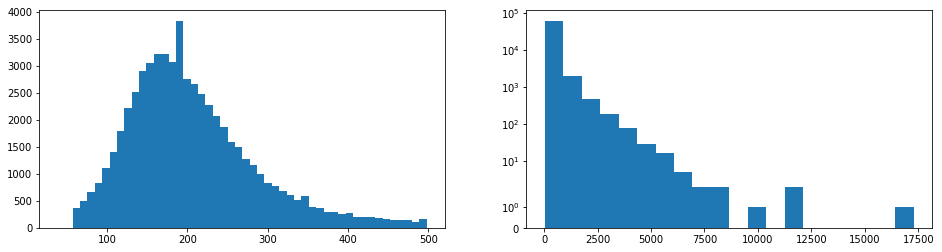

In [123]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(df2['query_match_len'][df2['query_match_len']<500],bins=50)

plt.subplot(1,2,2)
plt.hist(df2['query_match_len'],bins=20)
plt.yscale('symlog')
plt.show()
plt.close()

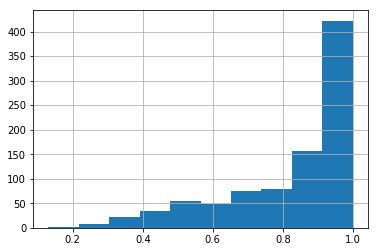

In [125]:
df_junonia2bombyx_ch['ratio_specific'].hist(bins=10)

#### scaffolds belongs to chromosome z with certain threshold



In [168]:
target_chromosome = 'Bomo_Chr1'
min_ratio_specific = 0.0
fout = open('/home/xcao/w/20180905Junonia_coenia/junonia_scaffolds_match_bombyx_'+target_chromosome,'w')
df_junonia2bombyx_ch2_filtered = df_junonia2bombyx_ch2[(df_junonia2bombyx_ch2['bombyx_id'] == target_chromosome) &
                          (df_junonia2bombyx_ch2['ratio_specific'] >= min_ratio_specific)]
fout.write('\n'.join(df_junonia2bombyx_ch2_filtered['junonia_id']))
fout.close()

In [169]:
print('junonia targeted chromosome length',df_junonia2bombyx_ch2_filtered['junonia_len'].sum())
print('bombyx targeted chromosome length', df_junonia2bombyx_ch2_filtered['bombyx_len'].iloc[0])

junonia targeted chromosome length 20760231
bombyx targeted chromosome length 20666287


In [170]:
df_junonia2bombyx_ch2_filtered

,junonia_id,bombyx_id,scaffold_match_len,total_match_len,ratio_specific,junonia_len,bombyx_len
68,000069F,Bomo_Chr1,81483,83901,0.971180,2005121,20666287
110,000112F,Bomo_Chr1,40524,44241,0.915983,1583224,20666287
139,000141F,Bomo_Chr1,70104,71307,0.983129,1327517,20666287
147,000149F,Bomo_Chr1,30963,36030,0.859367,1268111,20666287
158,000160F,Bomo_Chr1,40410,47643,0.848183,1167383,20666287
168,000170F,Bomo_Chr1,65628,69789,0.940377,1094216,20666287
174,000176F,Bomo_Chr1,80694,83676,0.964363,1050708,20666287
179,000181F,Bomo_Chr1,61962,63705,0.972640,1024803,20666287
181,000183F,Bomo_Chr1,26457,28677,0.922586,1010955,20666287
187,000189F,Bomo_Chr1,35943,38544,0.932519,984295,20666287


#### Get some information from the Spodoptera litura genome

In [92]:
filename = '/home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna'
from Bio import SeqIO
fout = open(filename + '.head','w')
for _e in SeqIO.parse(filename,'fasta'):
    fout.write(_e.description+'\n')
fout.close()
fout = open(filename +'.len','w')
for _e in SeqIO.parse(filename,'fasta'):
    fout.write(_e.id+'\t'+str(len(_e.seq))+'\n')
fout.close()

#### run promer to compare the genome of Junonia_coenia and Spodoptera litura


the mummer 4.0 promer cannot run well. use the 3.23 version
`/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3 /home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna /home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa`

`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.coords`

filter the .delta file to only include 1to1 best match.
`/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.qr`

coords of filtered .delta file
`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.qr >/home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.coords.qr`

draw the fiugre
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta.qr`

In [97]:
chromosome_name = 'NC_036217.1'
genome_file = '/home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna'
from Bio import SeqIO
for e in SeqIO.parse(genome_file,'fasta'):
    if e.id == chromosome_name:
        open(genome_file+'.'+chromosome_name,'w').write('>'+e.id+'\n'+str(e.seq)+'\n')
fout = open('/home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta.qr.' + chromosome_name,'w')
l = open('/home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta.qr').readlines()
fout.write(l[0].replace(genome_file,genome_file+'.'+chromosome_name))
fout.write(l[1])
n = 2
while n < len(l):
    e = l[n]
    if e[0] == '>':
        if chromosome_name in e[1:].split():
            fout.write(e)
            n += 1
            e = l[n]
            while e[0] != '>':
                fout.write(e)
                n += 1
                e = l[n]
        else:
            n += 1
    else:
        n += 1
fout.close()

draw the figure, only with NC_036217.1, the z-chromosome
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta.qr.NC_036217.1 -t postscript -p /home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.delta.qr.NC_036217.1
`
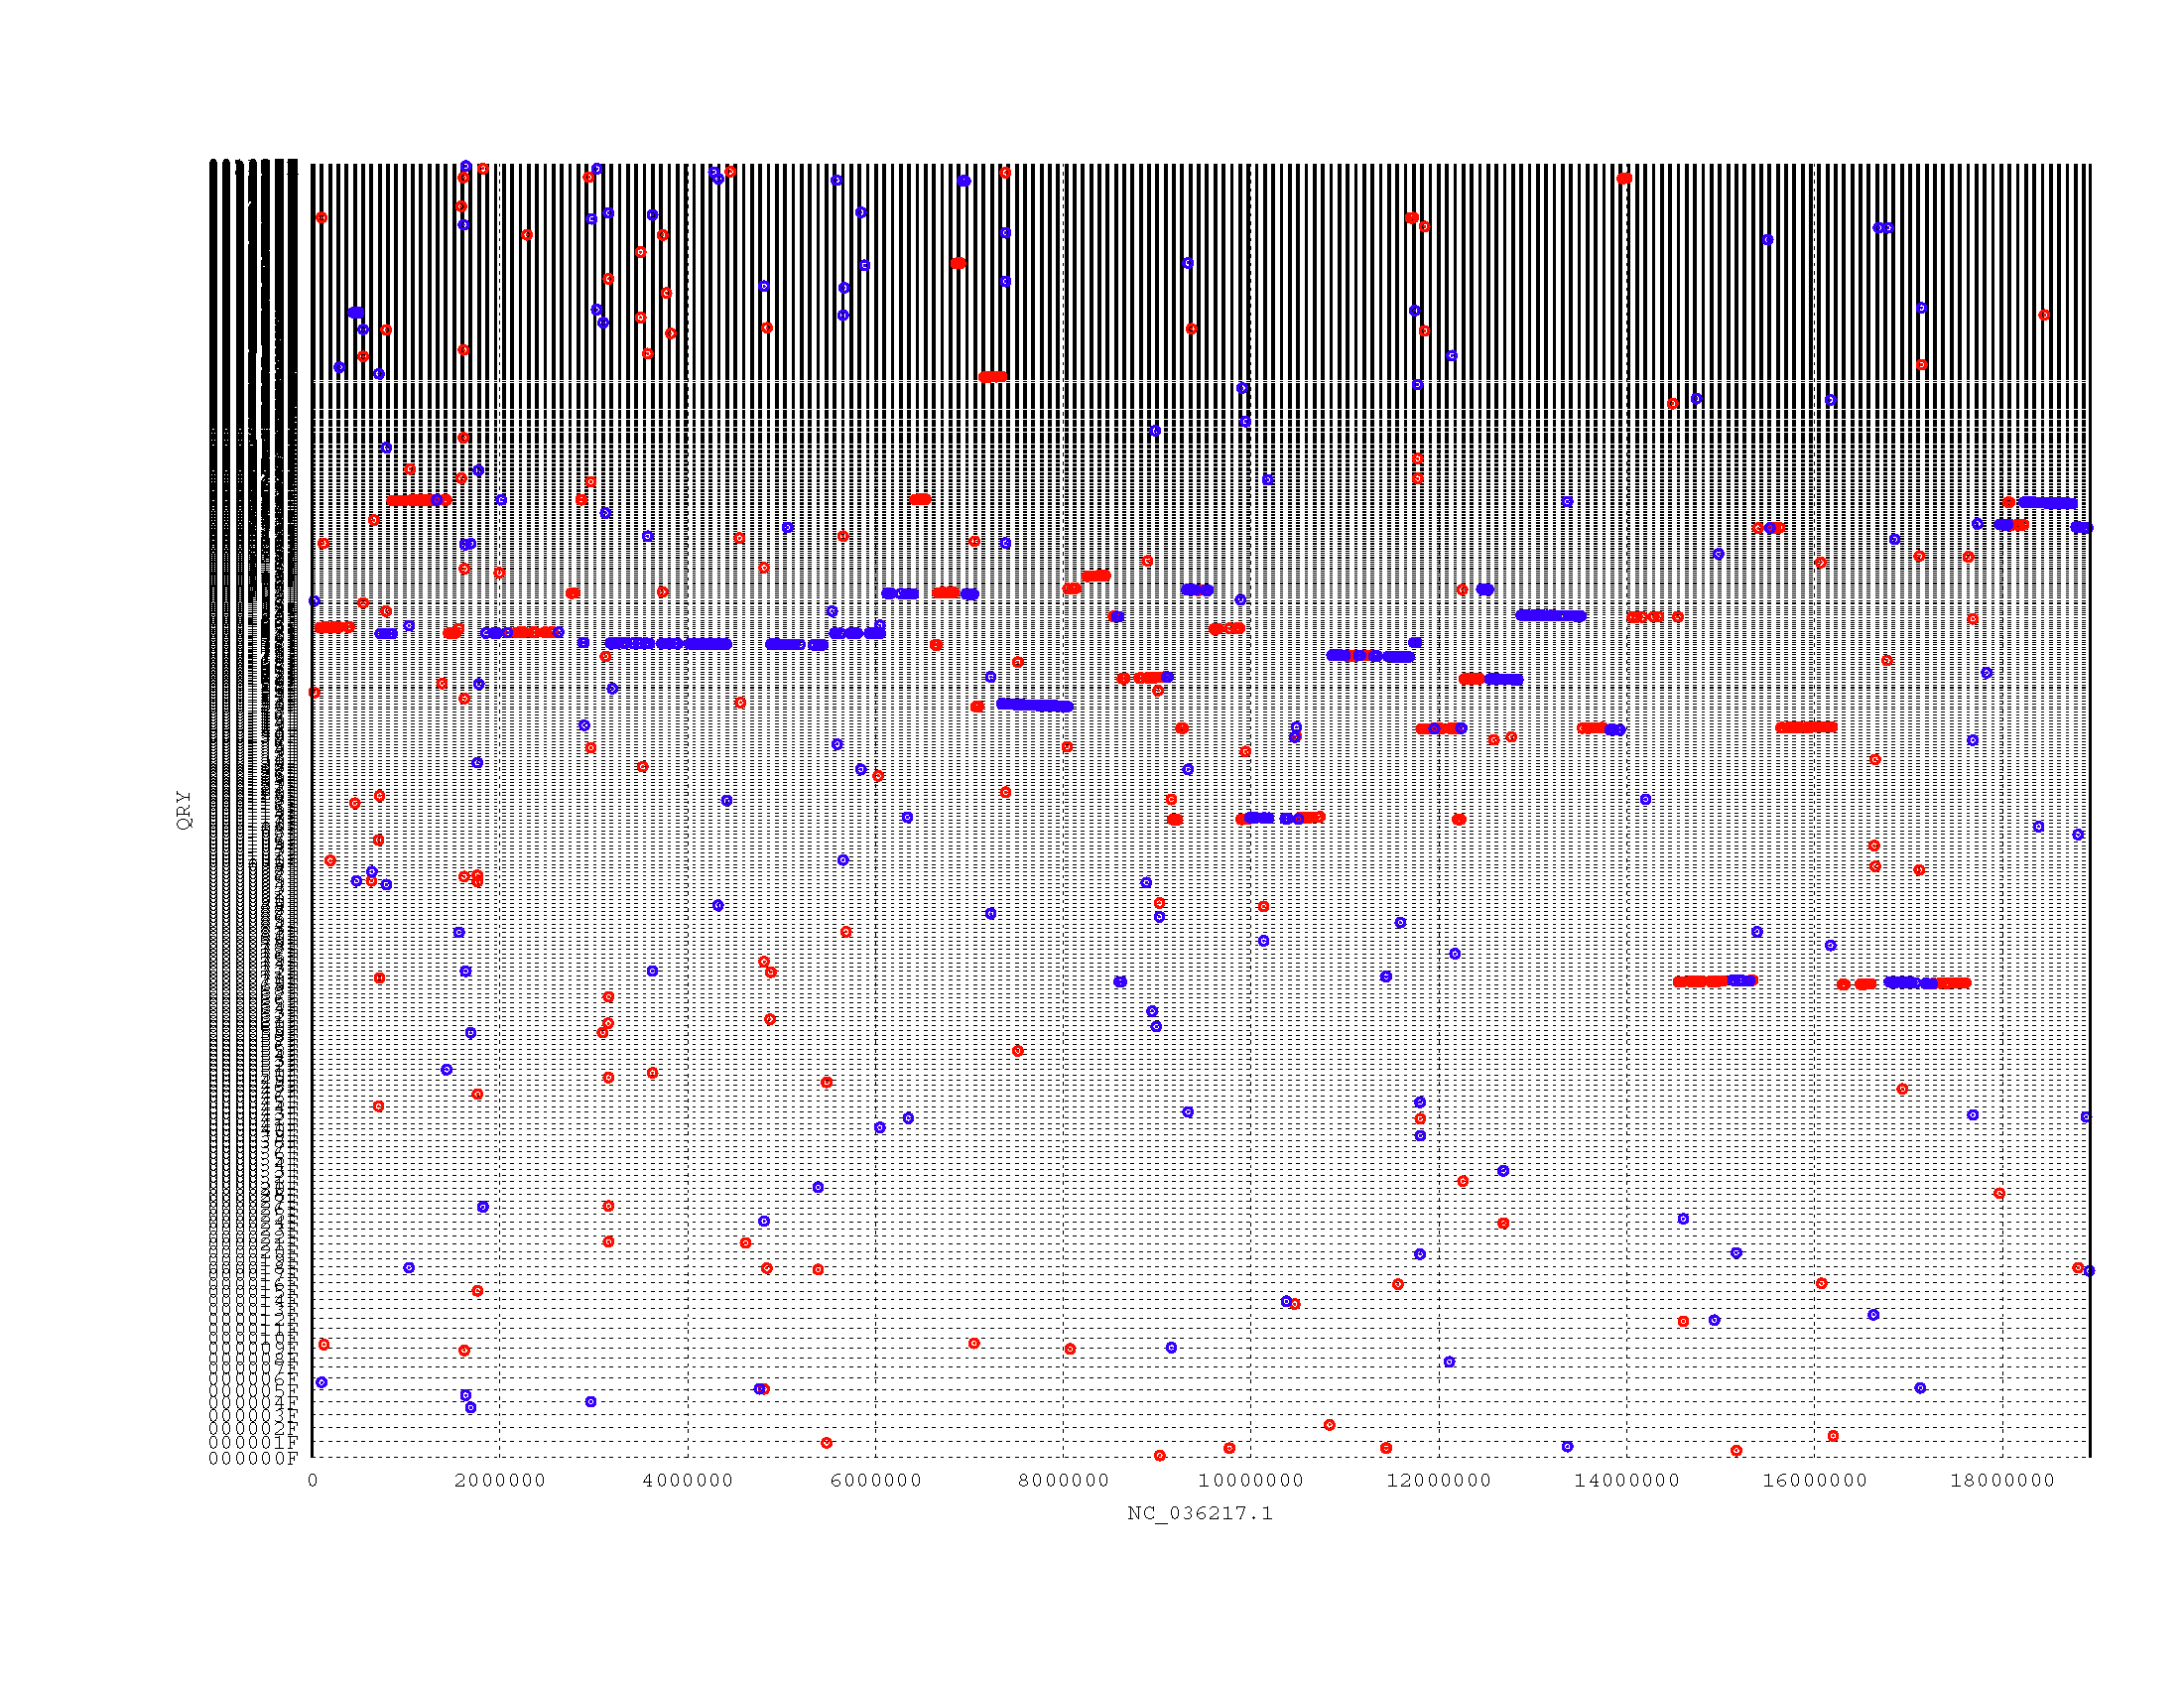

It is clear that some scaffolds can align well with `NC_036217.1`, the z-chromosome.

#### scaffolds belongs to chromosome z of Spodoptera

In [173]:
filename_coord = '/home/xcao/w/20180905Junonia_coenia/Junonia2Spodoptera.promer3.coords.qr'
filename_genome_ref = '/home/xcao/w/genomes/Spodoptera_litura/GCF_002706865.1_ASM270686v1_genomic.fna.len'
filename_genome_test = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'
target_chromosome = 'NC_036217.1'
min_ratio_specific = 0


filename = filename_coord
l = open(filename).readlines()
ls =[e.split() for e in l[5:]]
import pandas as pd
df = pd.DataFrame(ls)
df2 = df[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20,21,22]].copy()
df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]] = df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]].apply(pd.to_numeric)
df2.columns = ['ref_start','ref_end','query_start','query_end','ref_match_len','query_match_len','identity',\
               'similarity','percent_stop_codon','ref_len','query_len','ref_coverage','query_coverage','ref_reading_frame',\
              'query_reading_frame','ref_id','query_id']
df3 = df2.groupby(['query_id','ref_id'])['ref_match_len'].sum()
l_test2ref_ch = [ [e,df3[e].idxmax(),df3[e].max(),df3[e].sum(), df3[e].max()/df3[e].sum()] for e in df3.index.unique(0)]
df_test2ref_ch = pd.DataFrame(l_test2ref_ch)
filename = filename_genome_test
df_test_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['test_len'])
filename = filename_genome_ref
df_ref_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['ref_len'])
df_test2ref_ch.columns = ['test_id','ref_id','scaffold_match_len','total_match_len','ratio_specific']
df_test2ref_ch1 = df_test2ref_ch.join(df_test_len,how='left',on=['test_id'])
df_test2ref_ch2 = df_test2ref_ch1.join(df_ref_len,how='left',on=['ref_id'])
df_test2ref_ch2_filtered = df_test2ref_ch2[(df_test2ref_ch2['ref_id'] == target_chromosome) &
                          (df_test2ref_ch2['ratio_specific'] >= min_ratio_specific)]
df_test2ref_ch2_filtered

,test_id,ref_id,scaffold_match_len,total_match_len,ratio_specific,test_len,ref_len
68,000069F,NC_036217.1,87492,92658,0.944247,2005121,18934769
111,000112F,NC_036217.1,40572,44478,0.912181,1583224,18934769
140,000141F,NC_036217.1,77763,82572,0.941760,1327517,18934769
148,000149F,NC_036217.1,35007,42846,0.817042,1268111,18934769
159,000160F,NC_036217.1,49518,53553,0.924654,1167383,18934769
169,000170F,NC_036217.1,70797,73272,0.966222,1094216,18934769
175,000176F,NC_036217.1,87138,88968,0.979431,1050708,18934769
180,000181F,NC_036217.1,51012,55443,0.920080,1024803,18934769
182,000183F,NC_036217.1,18681,26373,0.708338,1010955,18934769
188,000189F,NC_036217.1,28053,37254,0.753020,984295,18934769


In [174]:
df_junonia2spodoptera_ch2_filtered = df_test2ref_ch2_filtered.copy()
df_junonia2spodoptera_ch2 = df_test2ref_ch2.copy()

#### Get some information from Heliconius melpomene Hmel2.5 genome


In [94]:
filename = '/home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa'
from Bio import SeqIO
fout = open(filename + '.head','w')
for _e in SeqIO.parse(filename,'fasta'):
    fout.write(_e.description+'\n')
fout.close()
fout = open(filename +'.len','w')
for _e in SeqIO.parse(filename,'fasta'):
    fout.write(_e.id+'\t'+str(len(_e.seq))+'\n')
fout.close()

In [98]:
chromosome_name = 'Hmel221001o'
genome_file = '/home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa'
from Bio import SeqIO
for e in SeqIO.parse(genome_file,'fasta'):
    if e.id == chromosome_name:
        open(genome_file+'.'+chromosome_name,'w').write('>'+e.id+'\n'+str(e.seq)+'\n')

#### run promer to compare the genome of Junonia_coenia and Heliconius melpomene Hmel2.5 genome


the mummer 4.0 promer cannot run well. use the 3.23 version
`/home/xcao/p/mummer/MUMmer3.23/promer  -p /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3 /home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa /home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa`

`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.coords`

filter the .delta file to only include 1to1 best match.
`/home/xcao/p/mummer/MUMmer3.23/delta-filter -q -r /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta >/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr`

coords of filtered .delta file
`/home/xcao/p/mummer/MUMmer3.23/show-coords -rcl /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr >/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.coords.qr`

draw the fiugre
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr -t postscript -p /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr`


In [104]:
chromosome_name = 'Hmel221001o'
genome_file = '/home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa'
from Bio import SeqIO
for e in SeqIO.parse(genome_file,'fasta'):
    if e.id == chromosome_name:
        open(genome_file+'.'+chromosome_name,'w').write('>'+e.id+'\n'+str(e.seq)+'\n')
fout = open('/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr.' + chromosome_name,'w')
l = open('/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr').readlines()
fout.write(l[0].replace(genome_file,genome_file+'.'+chromosome_name))
fout.write(l[1])
n = 2
while n < len(l):
    e = l[n]
    if e[0] == '>':
        if chromosome_name in e[1:].split():
            fout.write(e)
            n += 1
            e = l[n]
            while e[0] != '>':
                fout.write(e)
                n += 1
                e = l[n]
        else:
            n += 1
    else:
        n += 1
fout.close()

draw the figure, only with Hmel221001o, the z-chromosome
`/home/xcao/p/mummer/MUMmer3.23/mummerplot /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr.Hmel221001o -t postscript -p /home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.delta.qr.Hmel221001o
`
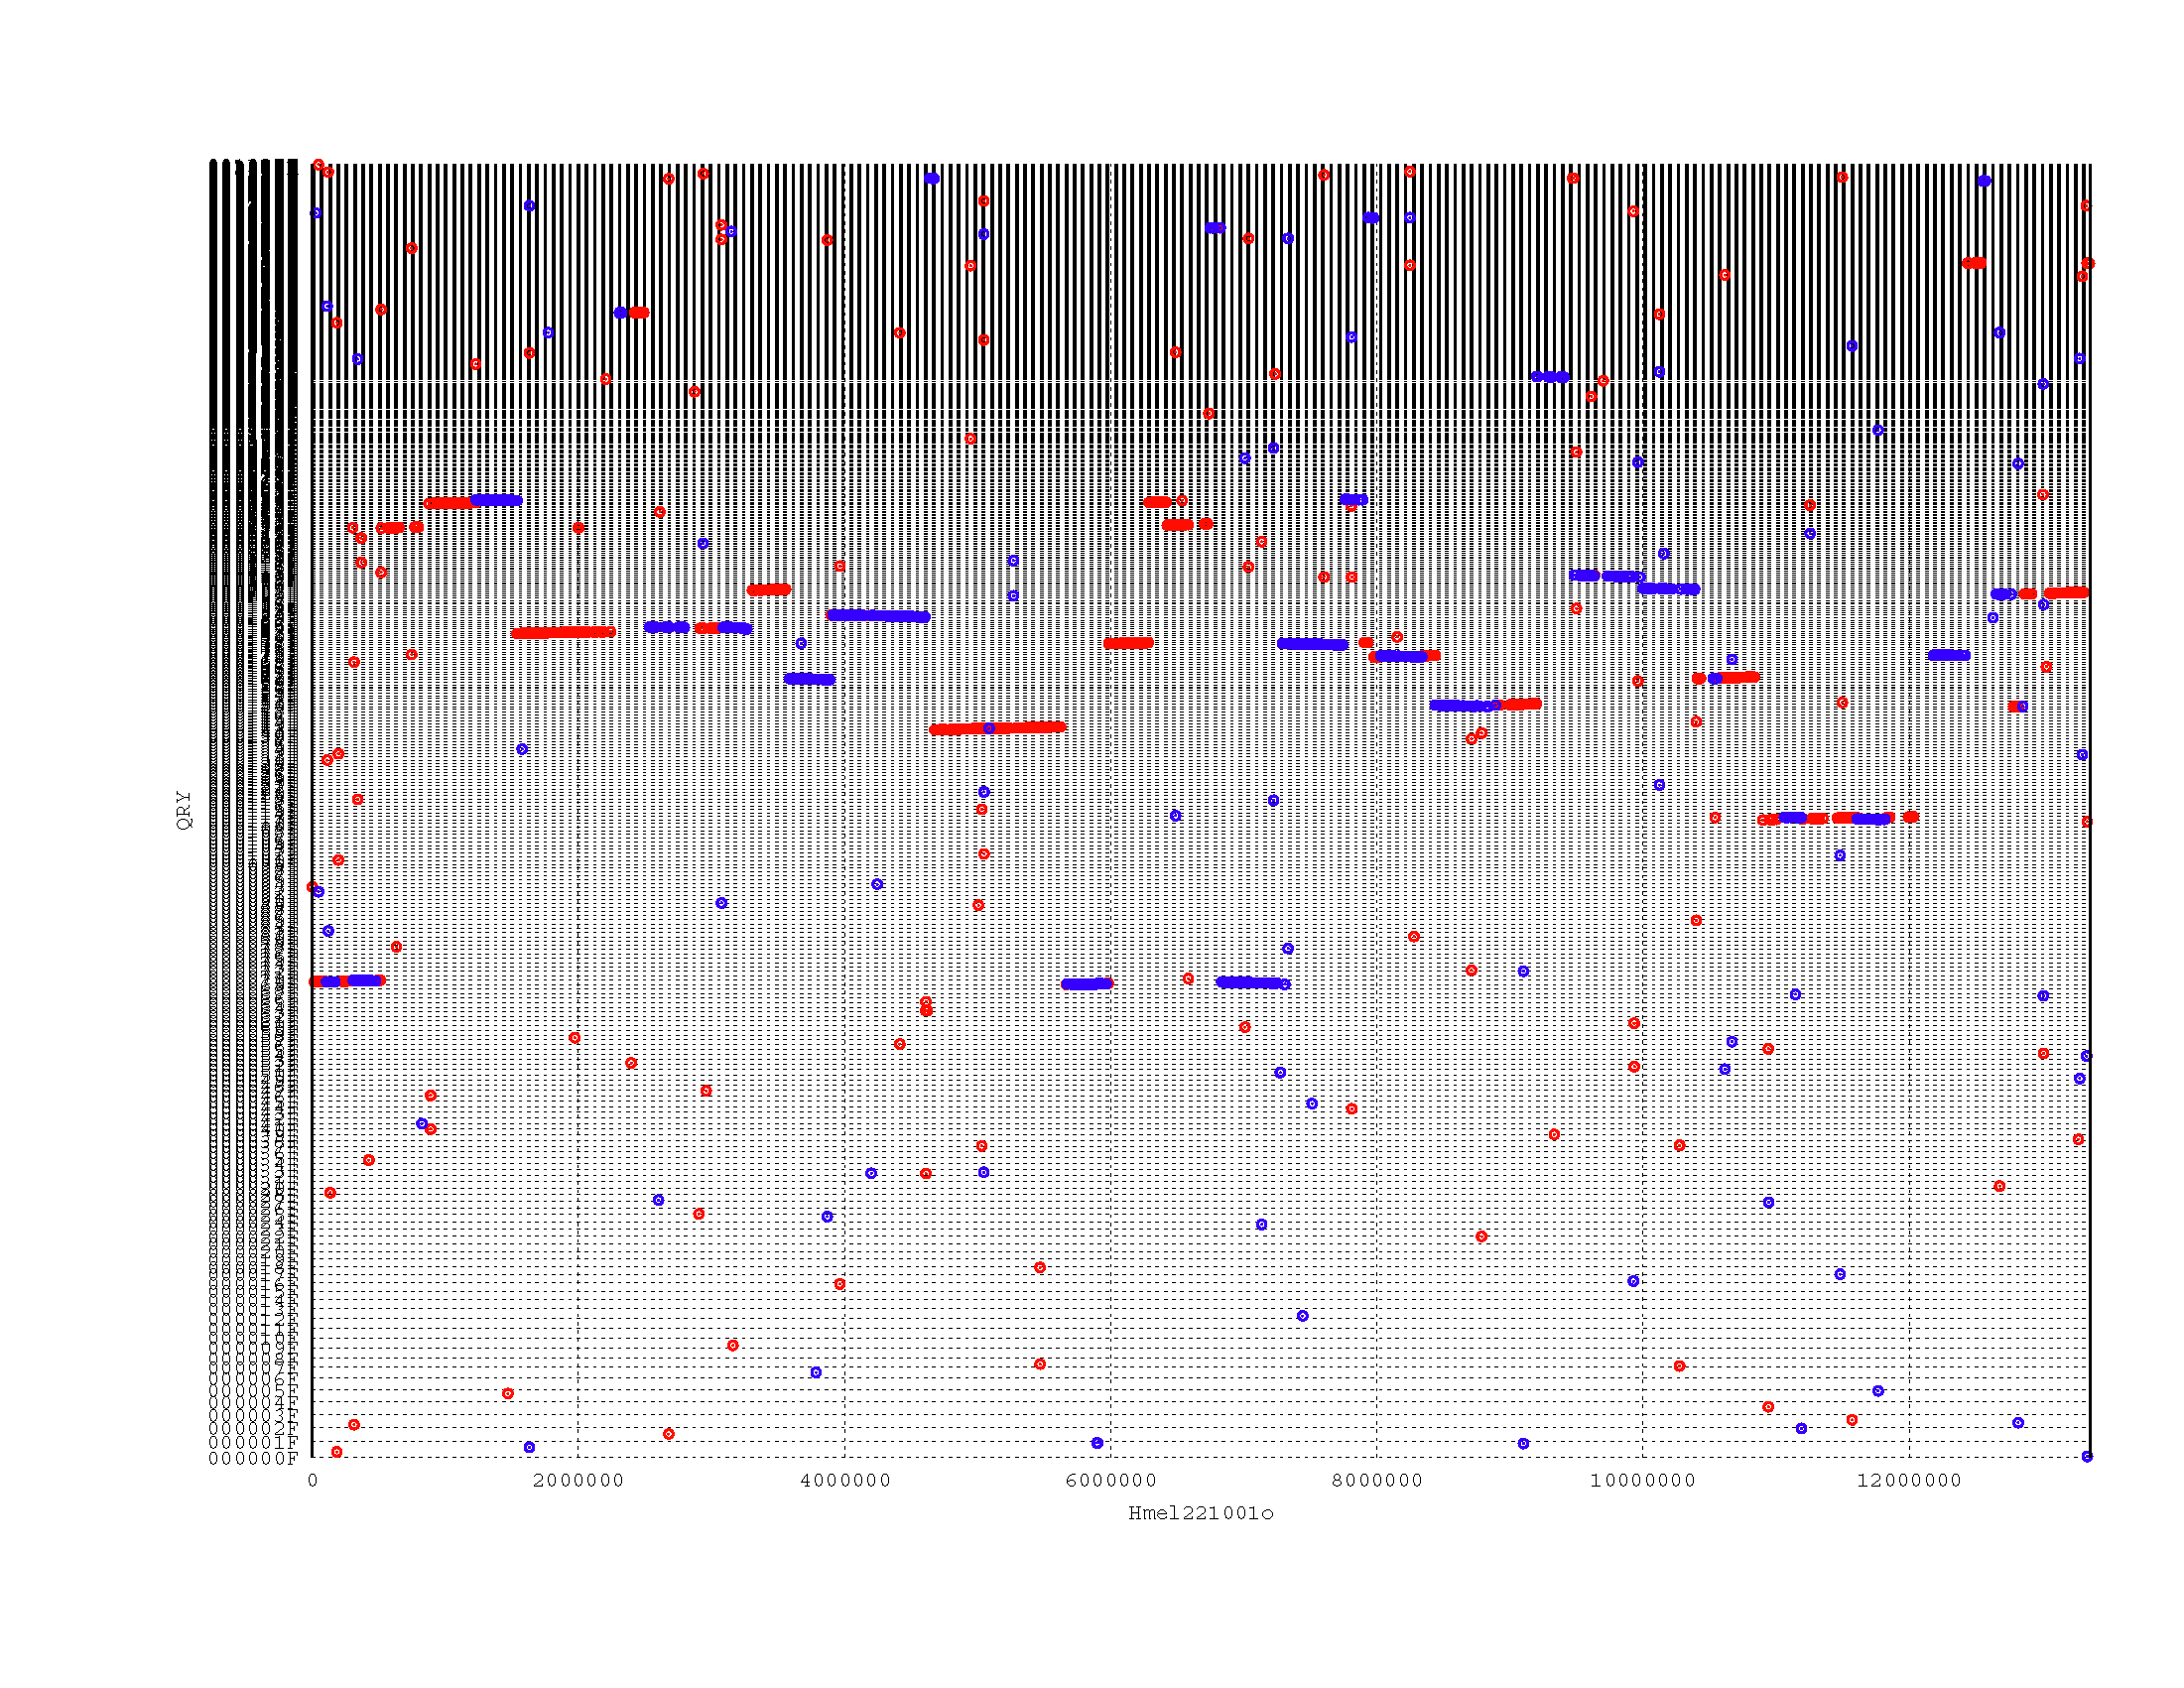

#### scaffolds belongs to chromosome z of Heliconius

In [171]:
filename_coord = '/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.coords.qr'
filename_genome_ref = '/home/xcao/w/genomes/Heliconius_melpomene/Heliconius_melpomene_melpomene_Hmel2.5.scaffolds.fa.len'
filename_genome_test = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'
target_chromosome = 'Hmel221001o'
min_ratio_specific = 0


filename = filename_coord
l = open(filename).readlines()
ls =[e.split() for e in l[5:]]
import pandas as pd
df = pd.DataFrame(ls)
df2 = df[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20,21,22]].copy()
df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]] = df2[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]].apply(pd.to_numeric)
df2.columns = ['ref_start','ref_end','query_start','query_end','ref_match_len','query_match_len','identity',\
               'similarity','percent_stop_codon','ref_len','query_len','ref_coverage','query_coverage','ref_reading_frame',\
              'query_reading_frame','ref_id','query_id']
df3 = df2.groupby(['query_id','ref_id'])['ref_match_len'].sum()
l_test2ref_ch = [ [e,df3[e].idxmax(),df3[e].max(),df3[e].sum(), df3[e].max()/df3[e].sum()] for e in df3.index.unique(0)]
df_test2ref_ch = pd.DataFrame(l_test2ref_ch)
filename = filename_genome_test
df_test_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['test_len'])
filename = filename_genome_ref
df_ref_len = pd.read_csv(filename,sep='\t',header=None,index_col=0, names=['ref_len'])
df_test2ref_ch.columns = ['test_id','ref_id','scaffold_match_len','total_match_len','ratio_specific']
df_test2ref_ch1 = df_test2ref_ch.join(df_test_len,how='left',on=['test_id'])
df_test2ref_ch2 = df_test2ref_ch1.join(df_ref_len,how='left',on=['ref_id'])
df_test2ref_ch2_filtered = df_test2ref_ch2[(df_test2ref_ch2['ref_id'] == target_chromosome) &
                          (df_test2ref_ch2['ratio_specific'] >= min_ratio_specific)]
df_test2ref_ch2_filtered

,test_id,ref_id,scaffold_match_len,total_match_len,ratio_specific,test_len,ref_len
68,000069F,Hmel221001o,136719,141591,0.965591,2005121,13359691
111,000112F,Hmel221001o,49569,54993,0.901369,1583224,13359691
140,000141F,Hmel221001o,116775,116775,1.000000,1327517,13359691
148,000149F,Hmel221001o,35160,36243,0.970118,1268111,13359691
159,000160F,Hmel221001o,70110,70989,0.987618,1167383,13359691
169,000170F,Hmel221001o,91566,91857,0.996832,1094216,13359691
175,000176F,Hmel221001o,117846,118239,0.996676,1050708,13359691
180,000181F,Hmel221001o,83958,85440,0.982654,1024803,13359691
182,000183F,Hmel221001o,33819,34143,0.990510,1010955,13359691
188,000189F,Hmel221001o,49698,49698,1.000000,984295,13359691


In [172]:
df_junonia2heliconius_ch2_filtered = df_test2ref_ch2_filtered.copy()
df_junonia2heliconius_ch2 = df_test2ref_ch2.copy()

#### scaffolds belongs to z chromosome of Bombyx, Spodoptera and Heliconius

In [175]:
print(df_junonia2bombyx_ch2_filtered.shape, df_junonia2spodoptera_ch2_filtered.shape, df_junonia2heliconius_ch2_filtered.shape)

(36, 7) (36, 7) (34, 7)


In [178]:
junonia_chromosomez_ids = set(list(df_junonia2bombyx_ch2_filtered['junonia_id']) + \
    list(df_junonia2spodoptera_ch2_filtered['test_id']) + \
    list(df_junonia2heliconius_ch2_filtered['test_id']))

In [179]:
junonia_chromosomez_ids = list(set(junonia_chromosomez_ids))
junonia_chromosomez_ids.sort()

In [180]:
df_junonia_chromosomez = pd.DataFrame()
df_junonia_chromosomez['junonia_id'] = junonia_chromosomez_ids
filename_genome_test = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'
df_test_len = pd.read_csv(filename_genome_test,sep='\t',header=None,index_col=0, names=['junonia_len'])
df_junonia_chromosomez = df_junonia_chromosomez.join(df_test_len,on='junonia_id',how='left')

_df = df_junonia2bombyx_ch2_filtered.copy()[['junonia_id','scaffold_match_len','ratio_specific']]
_df = _df.set_index('junonia_id')
_df.columns = ['bombyx_mlen','bombyx_ratio']
df_junonia_chromosomez = df_junonia_chromosomez.join(_df,on='junonia_id',how='left')

_df = df_junonia2spodoptera_ch2_filtered.copy()[['test_id','scaffold_match_len','ratio_specific']]
_df = _df.set_index('test_id')
_df.columns = ['spodoptera_mlen','spodoptera_ratio']
df_junonia_chromosomez = df_junonia_chromosomez.join(_df,on='junonia_id',how='left')

_df =  df_junonia2heliconius_ch2_filtered.copy()[['test_id','scaffold_match_len','ratio_specific']]
_df = _df.set_index('test_id')
_df.columns = ['heliconius_mlen','heliconius_ratio']
df_junonia_chromosomez = df_junonia_chromosomez.join(_df,on='junonia_id',how='left')

df_junonia_chromosomez

,junonia_id,junonia_len,bombyx_mlen,bombyx_ratio,spodoptera_mlen,spodoptera_ratio,heliconius_mlen,heliconius_ratio
0,000069F,2005121,81483.0,0.971180,87492.0,0.944247,136719.0,0.965591
1,000112F,1583224,40524.0,0.915983,40572.0,0.912181,49569.0,0.901369
2,000141F,1327517,70104.0,0.983129,77763.0,0.941760,116775.0,1.000000
3,000149F,1268111,30963.0,0.859367,35007.0,0.817042,35160.0,0.970118
4,000160F,1167383,40410.0,0.848183,49518.0,0.924654,70110.0,0.987618
5,000170F,1094216,65628.0,0.940377,70797.0,0.966222,91566.0,0.996832
6,000176F,1050708,80694.0,0.964363,87138.0,0.979431,117846.0,0.996676
7,000181F,1024803,61962.0,0.972640,51012.0,0.920080,83958.0,0.982654
8,000183F,1010955,26457.0,0.922586,18681.0,0.708338,33819.0,0.990510
9,000189F,984295,35943.0,0.932519,28053.0,0.753020,49698.0,1.000000


In [185]:
df_junonia_chromosomez_keep = df_junonia_chromosomez.dropna()
print('all possible scaffolds', df_junonia_chromosomez.shape[0],'total length', df_junonia_chromosomez['junonia_len'].sum())
print('shared scaffolds', df_junonia_chromosomez_keep.shape[0], df_junonia_chromosomez_keep['junonia_len'].sum())

all possible scaffolds 59 total length 23013904
shared scaffolds 22 19003383


In [187]:
l_junonia_z_by3species= list(df_junonia_chromosomez_keep['junonia_id'])
print(l_junonia_z_by3species)

['000069F', '000112F', '000141F', '000149F', '000160F', '000170F', '000176F', '000181F', '000183F', '000189F', '000200F', '000202F', '000209F', '000237F', '000239F', '000253F', '000255F', '000362F', '000446F', '000627F', '000659F', '000833F']


In [188]:
open('/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species','w').write('\n'.join(l_junonia_z_by3species))

175

### check existence of files related with Junonia

#### raw files fastq files

Based on the ` Junonia-all-sequenced.xlsx` file I got, there are totally 301 genomes sequenced for Junonia coenia. One of them `NVG-15117F05` is not sequence yet.

check if all those raw fastq files exist.

In [8]:
filename = '/home/xcao/w/20180905Junonia_coenia/junonia_coenia_sequenced_genomes_prefixes.txt'
l_junoniaPrefixes = open(filename).read().split()
print('total number of sequenced genomes is', len(l_junoniaPrefixes))
#convert names like 'NVG-15112B04' to '15112B04'
l_junoniaPrefixes = [e if '-' not in e else e.split('-')[-1] for e in l_junoniaPrefixes ]

total number of sequenced genomes is 301


In [204]:
import glob
files_fastqs = glob.glob('/archive/butterfly/ready_fastq/*.*')
print('total number of fastq files is',len(files_fastqs))

total number of fastq files is 20671


In [205]:
files_fastqs = set(files_fastqs)
l_junonia_withfastq = [e for e in l_junoniaPrefixes \
                       if '/archive/butterfly/ready_fastq/'+e+'_R1.fastq' in files_fastqs and \
                      '/archive/butterfly/ready_fastq/'+e+'_R2.fastq' in files_fastqs]
print('number of Junonia samples with fastq is', len(l_junonia_withfastq))

number of Junonia samples with fastq is 300


In [206]:
[e for e in l_junoniaPrefixes \
                       if '/archive/butterfly/ready_fastq/'+e+'_R1.fastq' not in files_fastqs or \
                      '/archive/butterfly/ready_fastq/'+e+'_R2.fastq' not in files_fastqs]

['3935']

the genome fastq sequence of '3935' is missing

#### check vfc files

In [207]:
import glob
folders_vfc = glob.glob('/archive/butterfly/SNP_results/debiased/*/')
print(folders_vfc[:2])
folders_vfc = set(folders_vfc)
print('number of vfc folders',len(folders_vfc))

['/archive/butterfly/SNP_results/debiased/7888_Lerema_accius_assembly_V1.1_withMito/', '/archive/butterfly/SNP_results/debiased/7412_Lerema_accius_assembly_V1.1_withMito/']
number of vfc folders 7659


In [208]:
l_junoia_withVFC = [e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/SNP_results/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds/' in folders_vfc]
print('number of Junonia samples with VFC is', len(l_junoia_withVFC))

number of Junonia samples with VFC is 280


In [209]:
print('the following Junonia sample do not have a VFC file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/SNP_results/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds/' not in folders_vfc])

the following Junonia sample do not have a VFC file against Junonia_coenia_JC_v1.0.scaffolds
['3935', '15117F08', '15117E12', '15117F06', '15117F02', '15117F03', '15117F07', '15117D12', '15117E01', '15117E02', '15117E03', '15117E04', '15117E09', '15117E10', '15117E11', '15117F04', '15117E08', '15117E05', '15117E06', '15117E07', '15117F01']


#### check map files

In [223]:
import glob
files_map = glob.glob('/archive/butterfly/maps/debiased/*.map')
print(files_map[:2])
files_map = set(files_map)
print('number of map files',len(files_map))

['/archive/butterfly/maps/debiased/3284_pxu_genome_snp_step2.map', '/archive/butterfly/maps/debiased/15109G07_3574_assembly_v1_withMito_snp_step2.map']
number of map files 13288


In [257]:
l_junoia_withMap = ['/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'\
                    for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' in files_map]
print('number of Junonia samples with Map file is', len(l_junoia_withMap))

number of Junonia samples with Map file is 260


In [11]:
print('the following Junonia sample do not have a map file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' not in files_map])

the following Junonia sample do not have a map file against Junonia_coenia_JC_v1.0.scaffolds
['3935', '8142', '8163', '8215', '8340', '8266', '8278', '15104E04', '15104E03', '8205', '8206', '15101B04', '8143', '8145', '8146', '8148', '8164', '8165', '8174', '8214', '8216', '15117F08', '15117E12', '15117F06', '15117F02', '15117F03', '15117F07', '15117D12', '15117E01', '15117E02', '15117E03', '15117E04', '15117E09', '15117E10', '15117E11', '15117F04', '15117E08', '15117E05', '15117E06', '15117E07', '15117F01']


In [258]:
list(l_junoia_withMap)[0]

'/archive/butterfly/maps/debiased/15102E08_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'

#### check fa file from map2fasta folder

the total bases in fasta file is different from the reference. Do not use it.

In [238]:
import glob
files_fa = glob.glob('/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/*.fa')
print(files_fa[:2])
files_fa = set(files_fa)
print('number of map files',len(files_fa))

['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/15101E01_phoebis_assembly_V1_snp_step2_m2s.fa', '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/17114A12_Lerema_accius_assembly_V1.1_withMito_snp_step2_m2s.fa']
number of map files 13486


In [240]:
l_junoia_withfa = [e for e in  l_junoniaPrefixes\
                   if '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/'\
                   +e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2_m2s.fa' in files_fa]
print('number of Junonia samples with fa file is', len(l_junoia_withfa))

number of Junonia samples with fa file is 260


### Extract sequences from vcf files of z-chromosome

some constents

In [215]:
SAMTOOLS = '/home/xcao/p/samtools/bin/bin/samtools'
BCFTOOLS = '/home/xcao/p/samtools/bin/bin/bcftools'
OUTFOLDER = '/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/'
JUNONIAGENOME = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa'

#### get a list of vcf.gz files

get the full path of all required vcf.gz files

In [210]:
filename = '/home/xcao/w/20180905Junonia_coenia/junonia_coenia_sequenced_genomes_prefixes.txt'
l_junoniaPrefixes = open(filename).read().split()
l_junoniaPrefixes = [e if '-' not in e else e.split('-')[-1] for e in l_junoniaPrefixes ]
print('total number of sequenced genomes is', len(l_junoniaPrefixes))

total number of sequenced genomes is 301


In [211]:
import glob
files_vfc = glob.glob('/archive/butterfly/SNP_results/debiased/'+\
                      '*_Junonia_coenia_JC_v1.0.scaffolds/*_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.vcf.gz')
print(len(files_vfc))

326


In [217]:
files_vfc_normal = [e for e in files_vfc if e.split('/')[-1].split('_')[0] in l_junoniaPrefixes]
print(len(files_vfc_normal),files_vfc_normal[:2])

280 ['/archive/butterfly/SNP_results/debiased/7166_Junonia_coenia_JC_v1.0.scaffolds/7166_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.vcf.gz', '/archive/butterfly/SNP_results/debiased/7080_Junonia_coenia_JC_v1.0.scaffolds/7080_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.vcf.gz']


In [214]:
files_vfc_abnorm = [e for e in files_vfc if e.split('/')[-1].split('_')[0] not in l_junoniaPrefixes]
print(len(files_vfc_abnorm))

46


#### index vcf files

in order to use `bfctools consensus`, the `vcf.gz` files need to be indexed. Create softlinks and index those files.

In [246]:
l_commands = []
for e in files_vfc_normal:
    _id = os.path.basename(e).split('_')[0]
    _link = '/home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/'+_id+'.vcf.gz'
    _command = '/home/xcao/p/samtools/bin/bin/bcftools   view --threads 1 -O z -o '  + _link +'  ' + e +' && ' + \
                '/home/xcao/p/samtools/bin/bin/tabix -p vcf ' + _link + '\n'
    l_commands.append(_command)
print(len(l_commands),l_commands[1])

280 /home/xcao/p/samtools/bin/bin/bcftools   view --threads 1 -O z -o /home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/7080.vcf.gz  /archive/butterfly/SNP_results/debiased/7080_Junonia_coenia_JC_v1.0.scaffolds/7080_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.vcf.gz && /home/xcao/p/samtools/bin/bin/tabix -p vcf /home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/7080.vcf.gz



In [247]:
open('/home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/20180914_index_vcf.gz.cmds',\
     'w').write(''.join(l_commands))

104820

then run the commands in bash.

#### extract fasta sequences of z chromosome

extract z-chromosome sequences

In [245]:
l_zchromosome_ids = open('/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species').read().split()
fout = open(OUTFOLDER + '20180913junonia_z_chromosome.fa','w')
from Bio import SeqIO
for _seq in SeqIO.parse(JUNONIAGENOME,'fasta'):
    if _seq.id in l_zchromosome_ids:
        fout.write('>'+_seq.id+'\n'+str(_seq.seq)+'\n')
fout.close()

In [222]:
import os

commands = ['ln -s ' +\
            'cat ' + OUTFOLDER + '20180913junonia_z_chromosome.fa | /home/xcao/p/samtools/bin/bin/bcftools consensus ' +\
            e +' > ' +OUTFOLDER + os.path.basename(e).split('_')[0]+'.fa' for e in files_vfc_normal]
print(len(commands))
print(commands[0])

280 cat /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_chromosome.fa | /home/xcao/p/samtools/bin/bin/bcftools consensus /archive/butterfly/SNP_results/debiased/7166_Junonia_coenia_JC_v1.0.scaffolds/7166_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.vcf.gz > /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/7166.fa


get individual sequences with `bcftools consensus`

With this method, the consensus sequences were extracted. However, sites with no mapped reads were also extracted. To overcome this, I decided to use the fasta file extracted from the `.map` file. 

The bcftools consensus will extract full chromosome sequences, while the codes in Grishin lab only include sites with reads-map. The later one is better.

Extract sequence from the fasta files. There are fasta files extracted from the `.map` files. Try to convert them to scaffolds first and then extract scaffolds needed.

In [253]:
import subprocess
_cmd = '/home/xcao/p/samtools/bin/bin/bcftools view -h /home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/4256.vcf.gz'
_s = subprocess.check_output(_cmd,shell=True)
_s = _s.decode('utf-8')

In [255]:
_contig_pre = '##contig'
import os
fout = open('/home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/20180914_index_vcf.gz.scaffolds.prefix','w')
for _l in _s.split('\n'):
    if len(_l)<1:
        continue
    if _l[0] != '#':
        fo.close()
        break
    else:
        if len(_l) > len(_contig_pre):
            if _l[:len(_contig_pre)] == _contig_pre:
                fout.write(_l.replace('##contig=<ID=','').replace(',length=','\t').replace('>','\n'))
fout.close()

change the `.fa` file to scaffolds format. It turns out that the `.fa` files are not good. The length is different from the size of the genome. Use the `.map` files.

In [256]:
import glob
files_fa = glob.glob('/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/*.fa')
print(files_fa[:2])
files_fa = set(files_fa)
print('number of map files',len(files_fa))

['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/15101E01_phoebis_assembly_V1_snp_step2_m2s.fa', '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/17114A12_Lerema_accius_assembly_V1.1_withMito_snp_step2_m2s.fa']
number of map files 13486


change the `.map` files to fasta files.

In [259]:
import glob
files_map = glob.glob('/archive/butterfly/maps/debiased/*.map')
files_map = set(files_map)
print('number of map files',len(files_map))
l_junoia_withMap = ['/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'\
                    for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' in files_map]
print('number of Junonia samples with Map file is', len(l_junoia_withMap))
print(l_junoia_withMap[:2])

number of map files 13288
number of Junonia samples with Map file is 260
['/archive/butterfly/maps/debiased/15102E08_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map', '/archive/butterfly/maps/debiased/5490_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map']


store the code below in a `/home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_map2fasta.py` file to run multiple processing.


```
import os
import pandas as pd
import sys
#file_map = '/archive/butterfly/maps/debiased/15102E08_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'

def changeMap2fasta(file_map):
    filename = '/home/xcao/w/20180905Junonia_coenia/20180913vcf_gz/20180914_index_vcf.gz.scaffolds.prefix'
    df_genome_len = pd.read_csv(filename,sep='\t',header=None,index_col=0)
    _dfseqs = pd.read_csv(file_map,sep='\t',header=None)
    seq1 = ''.join(_dfseqs[0])
    seq2 = ''.join(_dfseqs[1])
    print('map file sequence len',len(seq1))
    file_out1 = '/home/xcao/w/20180905Junonia_coenia/20180913snp_in_chromosome/' + os.path.basename(file_map).split('_')[0]+'.1.fa'
    file_out2 = '/home/xcao/w/20180905Junonia_coenia/20180913snp_in_chromosome/' + os.path.basename(file_map).split('_')[0]+'.2.fa'
    fout1 = open(file_out1,'w')
    fout2 = open(file_out2,'w')
    _start = 0
    for _ch in df_genome_len.index:
        fout1.write('>'+_ch+'\n')
        fout2.write('>'+_ch+'\n')
        _end = int(_start + df_genome_len.loc[_ch])
        _seq1 = seq1[_start:_end]
        _seq2 = seq2[_start:_end]
        _start = _end
        fout1.write(_seq1+'\n')
        fout2.write(_seq2+'\n')
    fout1.close()
    fout2.close()

file_map = sys.argv[1]
changeMap2fasta(file_map)
```

generate cmds

In [263]:
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/20180916junonia.map2fa.cmds','w').write('\n'.join(\
     ['/home/xcao/p/anaconda3_5.2.0/bin/python3 /home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_map2fasta.py '+\
      e for e in l_junoia_withMap]))

52932

about 30 GB per thread. For alea01, use 20 threads.
run the cmd files with the commandline `/home/xcao/p/anaconda3_5.2.0/bin/python3 /home/xcao/p/xiaolongTools/multiThread.py 20 /home/xcao/w/20180905Junonia_coenia/20180913scripts/20180916junonia.map2fa.cmds`

extract sequences from the first strand of scaffolds. Extract the sequences as single fasta file.

In [265]:
import glob
l_snp_fasta_file1s = glob.glob('/home/xcao/w/20180905Junonia_coenia/20180913snp_in_chromosome/*.1.fa')
print(len(l_snp_fasta_file1s))
print(l_snp_fasta_file1s[:2])

260
['/home/xcao/w/20180905Junonia_coenia/20180913snp_in_chromosome/7087.1.fa', '/home/xcao/w/20180905Junonia_coenia/20180913snp_in_chromosome/5670.1.fa']


store the code below in a `/home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_extract_z_fasta.py` file to run multiple processing.

```
import os
import sys
from Bio import SeqIO
scaffolds = open('/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species').read().split()
scaffolds = set(scaffolds)
filename = sys.argv[1]
sample_id = os.path.basename(filename).split('.')[0]
fout = open('/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/'+os.path.basename(filename)+'.z','w')
_to_write = '>'+sample_id+'\n'
_l_fasta = SeqIO.parse(filename,'fasta')
for _s in _l_fasta:
    if _s.id in scaffolds:
        _to_write = _to_write + str(_s.seq)
_to_write = _to_write +'\n'
fout.write(_to_write)
fout.close()
```

generate cmds

In [268]:
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_extract_z_fasta.cmds','w').write('\n'.join(\
['/home/xcao/p/anaconda3_5.2.0/bin/python3 /home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_extract_z_fasta.py '+\
      e for e in l_snp_fasta_file1s]))

51112

run the cmd files with the commandline `/home/xcao/p/anaconda3_5.2.0/bin/python3 /home/xcao/p/xiaolongTools/multiThread.py 32 /home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_extract_z_fasta.cmds`

#### create alignment file in fasta format

also filter the gap sites. First, read the fasta files to a dataframe. Replace sites with none "ATCG" to "-". 
filter each position. Only keep position with 100% "ATCG".
Write the final fasta file.

In [269]:
import glob
l_fastas = glob.glob('/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/*.z')
print(len(l_fastas))
print(l_fastas[:2])

260
['/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/4499.1.fa.z', '/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/5847.1.fa.z']


read the 260 fasta files to a dataframe. (codes below is run interactively with ipython)

```
from Bio import SeqIO
import pandas as pd
import re
df_samples_z = pd.DataFrame()
l_fasta_seqs = []
for _e in l_fastas:
    _seq = SeqIO.read(_e,'fasta')
    l_fasta_seqs.append(_seq)

for _e in l_fasta_seqs:
    print(_e.id)
    _seq = str(_e.seq)
    _ss = list(re.sub('[^ATCG]','-',str(_seq)))
    df_samples_z[_e.id] = _ss
```

In [ ]:
fout = open('/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all.map2','w')
for _i in df_samples_z.index:
    fout.write(''.join(df_samples_z.loc[_i]+'\n'))
fout.close()

In [270]:
# combine all fasta files
def combine_all_fasta(l_fastas):
    fout = open('/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all.GapReplaced.fa','w')
    from Bio import SeqIO
    import re
    for _e in l_fastas:
        _seq = SeqIO.read(_e,'fasta')
        _ss = re.sub('[^ATCG]','-',str(_seq.seq))
        fout.write('>'+_seq.id+'\n'+_ss+'\n')
    
    fout.close()

combine_all_fasta(l_fastas)

#### gaps

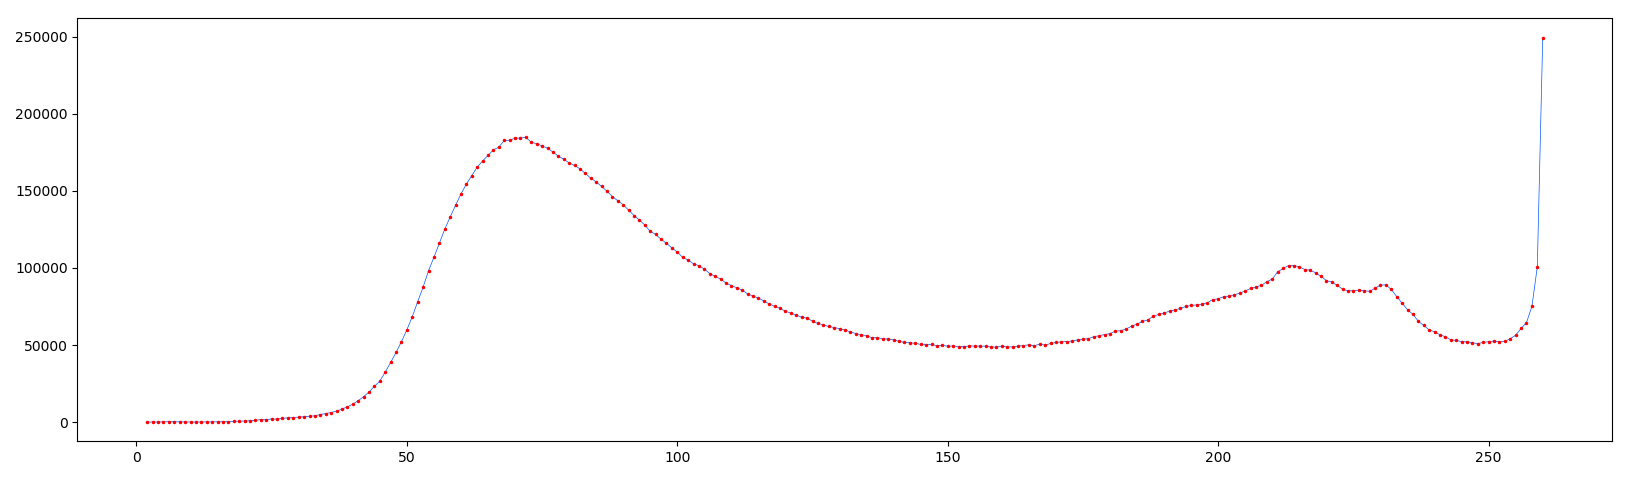

### create alignment file in fasta format and run RAxML

Jing's method

```
python3 /home/xcao/p/xiaolongTools/rmGap_zhangjing.py /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all.GapReplaced.fa 0.8
/home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all_rmGap_0.8.fasta -n 20180913junonia_z_all_rmGap_0.8 -T 32
```

```
python3 /home/xcao/p/xiaolongTools/rmGap_zhangjing.py /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all.GapReplaced.fa 0.9
/home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all_rmGap_0.9.fasta -n 20180913junonia_z_all_rmGap_0.9 -T 32
```


convert the tree file to annotate them.
Copy the file to UTSW bioHPC
```
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /home2/mtang/xiaolongTemp/RAxML_bestTree.20180913junonia_z_all_rmGap_0.8
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /home2/mtang/xiaolongTemp/RAxML_bestTree.20180913junonia_z_all_rmGap_0.9

```

### get sites for z-chromosome

```
file_info = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds'
file_scaffold_z = '/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species'
file_z_sites = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_Z'

fo = open(file_info)
scaffold_z = set(open(file_scaffold_z).read().split())
fout_z = open(file_z_sites,'w')
for line in fo:
    es = line.split()
    if es[2] in scaffold_z:
        fout_z.write(es[0]+'\n')
fout_z.close()
```

## phylogenetic tree with whole genome

### get statistics of bwa alignments

In [9]:
import glob
files = glob.glob('/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/*.report')
print(files[:2])
files = set(files)
print('number of files',len(files))

['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/6256_Calycopis_cecrops_assembly_V1.1_withMito_stat.report', '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/5732_3614_assembly_v1_mitogenome_stat.report']
number of files 7246


In [10]:
l_junoia_with_file = ['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/'+e+\
                      '_Junonia_coenia_JC_v1.0.scaffolds_stat.report' for e in l_junoniaPrefixes \
                   if '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/'+e+\
                      '_Junonia_coenia_JC_v1.0.scaffolds_stat.report' in files]
print('number of Junonia samples with file is', len(l_junoia_with_file))

number of Junonia samples with file is 260


In [11]:
print('the following Junonia sample do not have a file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/'+e+\
                      '_Junonia_coenia_JC_v1.0.scaffolds_stat.report' not in files])

the following Junonia sample do not have a file against Junonia_coenia_JC_v1.0.scaffolds
['3935', '8142', '8163', '8215', '8340', '8266', '8278', '15104E04', '15104E03', '8205', '8206', '15101B04', '8143', '8145', '8146', '8148', '8164', '8165', '8174', '8214', '8216', '15117F08', '15117E12', '15117F06', '15117F02', '15117F03', '15117F07', '15117D12', '15117E01', '15117E02', '15117E03', '15117E04', '15117E09', '15117E10', '15117E11', '15117F04', '15117E08', '15117E05', '15117E06', '15117E07', '15117F01']


In [14]:
#summerize the stat file
import pandas as pd
df_align_stat = pd.concat([pd.read_csv(e,sep='\t',dtype=str) for e in l_junoia_with_file],ignore_index=True)
df_align_stat.head()

,sample,reference,data_amount,map_read%(byReads),map_read%(halfmap),map_read%(byPosition),expected_coverage,genome_coverage,coverage_mean,coverage_median
0,15102E08,Junonia_coenia_JC_v1.0.scaffolds,2.20Gbp,83.45%,72.50%,55.73%,2.09,27.79%,3.76,2.00
1,5490,Junonia_coenia_JC_v1.0.scaffolds,3.79Gbp,86.93%,82.71%,77.99%,5.04,51.02%,7.26,4.00
2,16106C04,Junonia_coenia_JC_v1.0.scaffolds,3.60Gbp,96.19%,82.78%,76.87%,4.72,54.58%,6.12,5.00
3,5518,Junonia_coenia_JC_v1.0.scaffolds,0.27Gbp,86.93%,82.71%,77.99%,0.36,5.23%,2.52,2.00
4,4758,Junonia_coenia_JC_v1.0.scaffolds,3.51Gbp,95.56%,89.45%,82.24%,4.92,64.66%,5.62,4.00


In [15]:
df_align_stat.to_excel('/home/xcao/w/20180905Junonia_coenia/20180913scripts/20180918junonia_align_stat.xlsx')

### get the fasta files

Given a file with location of `.map` files and required coverage, output a fasta file for sequence alignment.

#### map files

In [17]:
import glob
files_map = glob.glob('/archive/butterfly/maps/debiased/*.map')
files_map = set(files_map)
print('number of map files',len(files_map))
l_junoia_withMap = ['/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'\
                    for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' in files_map]
print('number of Junonia samples with Map file is', len(l_junoia_withMap),l_junoia_withMap[:2])

number of map files 13288
number of Junonia samples with Map file is 260 ['/archive/butterfly/maps/debiased/15102E08_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map', '/archive/butterfly/maps/debiased/5490_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map']


In [18]:
open('/home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt','w').write('\n'.join(l_junoia_withMap))

22252

#### gapCounts in each position

code below is saved in 
`/home/xcao/p/xiaolongTools/utils/countGapEachPositionFromMapFiles.py`

```
from multiprocessing import Pool
import numpy as np

def countgap(filename,strand=0):
    '''
    given a map file, return a numpy array of 1 or 0 showing whether a position is a gap
    1 means gap, and 0 means 'ATCG'
    strand = 0 or 3, the first or the second strand
    '''
    return np.array([e[strand] not in 'ATCG' for e in open(filename)],dtype=np.int16)

def countgaps(filenames,strand = 0, threads = 16):
    '''
    given a list of map filenames, a numpy array the number of gaps in each position.
    those map filenames should be from the same genome
    strand = 0 or 3, the first or the second strand
    '''
    pool = Pool(threads)
    gaps = pool.map(countgap,filenames)
    pool.close()
    return sum(gaps)

def array2str(np_array):
    '''
    convert a numpy array to str, joined by '\n'
    '''
    np_array = np_array.astype(str)
    return '\n'.join(np_array)+'\n'

def array2str_thread(np_array,threads = 16):
    '''
    convert a numpy str array to str, joined by '\n'
    with thread enabled
    '''
    pool = Pool(threads)
    substrs = pool.map(array2str, np.array_split(np_array,threads))
    pool.close()
    return '\n'.join(substrs)

def gapCountsConvert2str(gapcounts,threads = 16):
    '''
    gapcounts is the np.int16 array. 
    convert it to a long str joined by '\n' to write with threads to speed up
    '''
#    gapstr = gapcounts.astype(str)
    gapstr = gapcounts
    gapstrs = np.array_split(gapstr,10)
    substrs = []
    for s in gapstrs:
        substrs.append(array2str_thread(s,threads=threads))
    return '\n'.join(substrs)
    

def countGapEachPositionFromMapFiles(files_map,strand=0,outfile = None,threads = 16):
    '''
    files_map is a file of a list of .map files, each with lines of nucleotide in two strands
    or files_map is a python list of .map files
    threads is the number of threads to use. Default 16
    strand = 0 or 1, the first or the second strand
    return a numpy array of np.int16 with counts of gaps in each position
    if outfile is not None, write a text file to store the result
    '''
    if strand == 0:
        strand = 0
    elif strand == 1:
        strand = 2
    else:
        print('wrong strand number!')
        return None
    print('threads used: ', threads)
    
    if type(files_map) is list:
        files = files_map
    else:
        files = open(files_map).read().split('\n')
        files = [e for e in files if e != ''] # remove empty files
    print('number of map files is ', len(files))
    
    # to save memories, apply the function in batch
    file_batches = [files[i:min(i+threads, len(files))] for i in range(0,len(files),threads)]
    gapcounts = countgaps(file_batches[0], strand=strand,threads=threads)
    l_bases = len(gapcounts)
    print('length of map file is', l_bases)
    for n in range(1,len(file_batches)):
        print('procession',threads * n)
        _gaps = countgaps(file_batches[n], strand=strand,threads=threads)
        gapcounts += _gaps
    
    # save the file
    if outfile is not None:
        with open(outfile,'w') as fout:
            fout.write(gapCountsConvert2str(gapcounts=gapcounts,threads=threads))
            fout.write('\n')
    
    return gapcounts

if __name__ == '__main__':
    import argparse
    parser = argparse.ArgumentParser(description='input file of location of many map files, output file with the count of gaps in each base location. This program can also be imported in other modules to return the value directly')
    parser.add_argument('-i','--input', help = 'input file storing the location of .map files', required=True)
    parser.add_argument('-t','--threads',help = 'number of threads to use', default = 16,type=int)
    parser.add_argument('-o','--output',help = 'location of the where the output file stored', required = True)
    parser.add_argument('-s','--strand', help = 'which strand to use. 0 or 1', default = 0, choices = [0,1], type=int)
    f = parser.parse_args()
    countGapEachPositionFromMapFiles(files_map=f.input, strand=f.strand, outfile=f.output, threads=f.threads)




```

run the command in linux to get gap counts in 260 map files
`python3 /home/xcao/p/xiaolongTools/utils/countGapEachPositionFromMapFiles.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -o /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand0.GapCounts -t 32 -s 0`

`python3 /home/xcao/p/xiaolongTools/utils/countGapEachPositionFromMapFiles.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -o /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand1.GapCounts -t 32 -s 1`

run the code below to get statistics about the GapCounts files
```
file_gapcounts = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand0.GapCounts'
from collections import Counter
filename = file_gapcounts
gapcounts = Counter(open(filename).read().split())
l_counts = list(gapcounts.items())
l_counts.sort(key=lambda x:int(x[0]))
fout = open(file_gapcounts+'.statistics','w')
for e in l_counts:
    fout.write(str(e[0])+'\t'+str(e[1])+'\n')
fout.close()
```

```
file_gapcounts = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand1.GapCounts'
from collections import Counter
filename = file_gapcounts
gapcounts = Counter(open(filename).read().split())
l_counts = list(gapcounts.items())
l_counts.sort(key=lambda x:int(x[0]))
fout = open(file_gapcounts+'.statistics','w')
for e in l_counts:
    fout.write(str(e[0])+'\t'+str(e[1])+'\n')
fout.close()
```

The gapCounts result from both strands are identical. gap counts range from 0 to 260. All values are not empty.

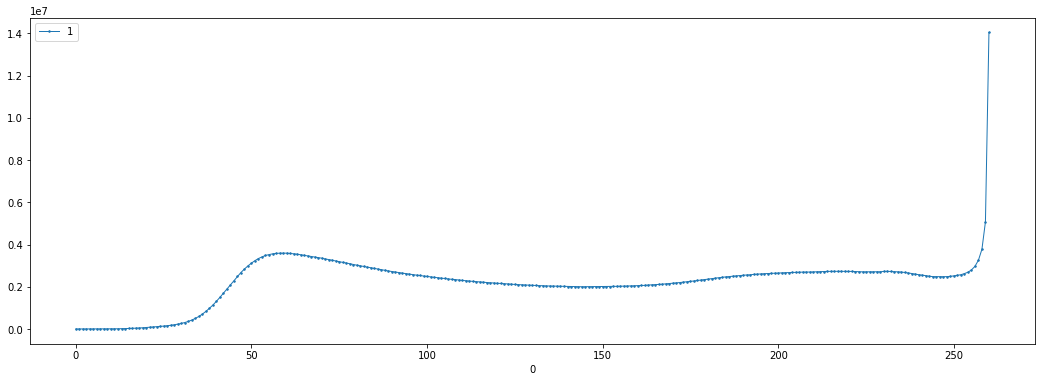

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand0.GapCounts.statistics',\
                 header=None,sep='\t')
df.plot(x=0,y=1,style='.-',markersize=3,figsize=(18, 6),linewidth=1)

#### get sites  file whole genome 95% and 90% none-gap (also 85% and 80%)

In [ ]:
# genome sites to keep
non_gap_ratio = 0.95
number_map_files = 260
number_map_max = int(number_map_files * (1-non_gap_ratio))
file_GapCounts = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand0.GapCounts'
file_siteKeep = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_'+str(non_gap_ratio)

fout = open(file_siteKeep,'w')
for n,v in enumerate(open(file_GapCounts)):
    if int(v.replace('\n','')) < number_map_max:
        fout.write(str(n)+'\n')
fout.close()

```
# genome sites to keep
non_gap_ratios = [0.4,0.5,0.6,0.7,0.8,0.90]
for non_gap_ratio in non_gap_ratios:
    number_map_files = 260
    number_map_max = int(number_map_files * (1-non_gap_ratio))
    file_GapCounts = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileStrand0.GapCounts'
    file_siteKeep = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_'+str(non_gap_ratio)

    fout = open(file_siteKeep,'w')
    for n,v in enumerate(open(file_GapCounts)):
        if int(v.replace('\n','')) < number_map_max:
            fout.write(str(n)+'\n')
    fout.close()
```

721839 sites for non_gap_ratio 0.90 and 39153 sites for non_gap_ratio 0.95  
32575136 sites for non_gap_ratio 0.80 and 6551536 sites for non_gap_ratio 0.85

#### get fasta file whole genome 95% and 90% none-gap  (also 85% and 80%)


the code below is to extract fasta sequences based on map file and sites to keep. Stored in `/home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py`

```


from multiprocessing import Pool
import numpy as np
import os


def extractSequenceFromMapFileInSites(filename,sites,strand = 0):
    '''
    filename is a map file, each line with two bases 'A\t\A\n'
    replace none 'ATCG' to '-'
    sites is a set of int, with sites in the map file that will be kept.
    strand = 0 or 2, the first or the second strand
    return a sequence of nucleotides
    '''
    s = []
    for n,e in enumerate(open(filename)):
        if n in sites:
            nt = e[strand]
            if nt not in 'ATCG':
                nt = '-'
            s.append(nt)
    return ''.join(s)

def extractSequencesFromMapFilesInSites(filenames,sites,strand = 0, threads = 16):
    '''
    given a list of map files, each line with two bases 'A\t\A\n'
    sites is a set of int, with sites in the map file that will be kept.
    strand = 0 or 2, the first or the second strand
    threads, number of thread to use
    return a list of sequence of nucleotides
    '''
    pool = Pool(threads)
    seqs = pool.starmap(extractSequenceFromMapFileInSites, [(e,sites,strand) for e in filenames])
    pool.close()
    return seqs

def filename2seqname(filename):
    '''
    filename of map file is like '5518_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' or '/archive/butterfly/maps/debiased/5518_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'
    return '5518' as the sequence name
    '''
    return os.path.basename(filename).split('_')[0]

def getSequencesFromMapFilesInSites(files_map,file_sites,outfile=None,strand = 0, threads = 16):
    '''
    files_map is a file store the location of map files, or a, or a list of map filepath
    map file, each line with two bases 'A\t\A\n'
    mapfilename is like '5518_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map', sequence name will be '5518'
    file_sites is a file, or a set of int, with sites in the map file that will be kept.
    if outfile is None, do not output fasta file, return a txt file in fasta format.
    if outfile is not None, write the fasta file to outfile.
    strand = 0 or 1, the first or the second strand
    threads, number of thread to use
    '''
    if strand == 0:
        strand = 0
    elif strand == 1:
        strand = 2
    else:
        print('wrong strand number!')
        return None
    print('threads used: ', threads)
    
    if type(files_map) is list:
        files = files_map
    else:
        files = open(files_map).read().split('\n')
        files = [e for e in files if e != ''] # remove empty files
    print('number of map files is ', len(files))
    
    if type(file_sites) is set:
        sites = file_sites
    else:
        sites = open(file_sites).read().split()
        sites = set([int(e) for e in sites])
    print('number of sites to keep is',len(sites))
    
    # process the files in batch
    if outfile is None:
        l_seqs = []
    else:
        fout = open(outfile,'w')
    file_batches = [files[i:min(i+threads, len(files))] for i in range(0,len(files),threads)]
    print('total batches',len(file_batches))
    for n, files_processing in enumerate(file_batches):
        print('processing batch',n)
        seqs = extractSequencesFromMapFilesInSites(filenames=files_processing, sites=sites, strand = strand, threads = threads)
        seqs_names = [filename2seqname(f) for f in files_processing]
        seqs_fasta = ['>'+seqs_names[n]+'\n'+seqs[n]+'\n' for n in range(len(files_processing))]
        if outfile is None:
            l_seqs = l_seqs + seqs_fasta
        else:
            fout.write(''.join(seqs_fasta))
    
    if outfile is None:
        return l_seqs
    else:
        fout.close()


if __name__ == '__main__':
    import argparse
    parser = argparse.ArgumentParser(description='input a file with filepath map files and sites to keep, output a fasta file. This program can also be imported in other modules to return the value directly')
    parser.add_argument('-i','--input', help = 'input file storing the location of .map files', required=True)
    parser.add_argument('-t','--threads',help = 'number of threads to use', default = 16,type=int)
    parser.add_argument('-b','--sites',help = 'sites that will be extracted', required = True)
    parser.add_argument('-o','--output',help = 'location of the where the output file stored', required = True)
    parser.add_argument('-s','--strand', help = 'which strand to use. 0 or 1', default = 0, choices = [0,1], type=int)
    f = parser.parse_args()
    getSequencesFromMapFilesInSites(files_map=f.input, file_sites=f.sites, strand=f.strand, outfile=f.output, threads=f.threads)


```

run the colde below to get fasta files of 95% and 90% non-gap genome  (also 85% and 80%)

`
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_0.95 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_rmGap_0.95.fa -t 32 -s 0
`


`
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_0.9 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_rmGap_0.9.fa -t 32 -s 0
`

`
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_0.85 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_rmGap_0.85.fa -t 32 -s 0
`


`
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_0.8 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_rmGap_0.8.fa -t 32 -s 0
`

#### some information about the genome

* number of scaffolds: 1136
* total bases: 585993674 
* total bases with A:191837947 T:192007488 C:101028310 G:101119929 N:0
* gene regions 142349067 24.29%  
* transcript regions 142349067  24.29%
* exon regions 37154198  6.34%
* CDS regions 22515575  3.84%


```
file_genome = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa'
file_gff3 = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.gff3'
file_vcf_order = '/home/xcao/w/genomes/Junonia_coenia/20180914_index_vcf.gz.scaffolds.prefix'

import pandas as pd
from Bio import SeqIO
ls_genome = list(SeqIO.parse(file_genome,'fasta'))
print('number of scaffolds',len(ls_genome))
len_genome = sum(len(e.seq) for e in ls_genome)
print('total bases',len_genome)
dc_basecount = {}
for i in 'ATCGN':
    dc_basecount[i] = sum(e.seq.count(i) for e in ls_genome)
    print(i, 'count:',dc_basecount[i])

l_positons = list(range(len_genome))

df_vcf_header = pd.read_csv(file_vcf_order,sep='\t',header=None)
print('\n'.join(list(df_vcf_header[0])) == '\n'.join([e.id for e in ls_genome]))
# the result above is true, which means that the order of genomes in vfc head are the same as the reference genome

l_positons = list(range(len_genome))
l_bases = list(''.join(str(e.seq) for e in ls_genome))
l_scaffold_ID = []
l_scaffold_positon = [] #starts from 1
l_gene = []
l_RNA = []
l_Exon = []
l_CDS = []

ll_scaffold_ID = []
ll_scaffold_positon = []
for e in ls_genome:
    ll_scaffold_ID.append([e.id] * len(e.seq))
    ll_scaffold_positon.append(list(range(1,len(e.seq)+1)))

import itertools
l_scaffold_ID = list(itertools.chain.from_iterable(ll_scaffold_ID))
l_scaffold_positon = list(itertools.chain.from_iterable(ll_scaffold_positon))

ls_gff3 = open(file_gff3).readlines()
print('length gff3',len(ls_gff3))
ls_gff3 = [e for e in ls_gff3 if len(e)>0]
print('length gff3',len(ls_gff3))
ls_gff3 = [e for e in ls_gff3 if e[0] != '#']
print('length gff3',len(ls_gff3))

dc_scfpos2gene = {s+'\t'+str(p):0 for s,p in zip(l_scaffold_ID,l_scaffold_positon)}
dc_scfpos2RNA = dc_scfpos2gene.copy()
dc_scfpos2Exon = dc_scfpos2gene.copy()
dc_scfpos2CDS = dc_scfpos2gene.copy()

dc_scfpos = {'gene':dc_scfpos2gene,'mRNA':dc_scfpos2RNA,'exon':dc_scfpos2Exon,'CDS':dc_scfpos2CDS}
for e in ls_gff3:
    es = e.split()
    keys = [es[0]+'\t'+str(i) for i in range(int(es[3]),int(es[4])+1)]
    for key in keys:
        dc_scfpos[es[2]][key] += 1

for key,value in dc_scfpos.items():
    print(key,'count',len([e for e in value.values() if e>0]))

dc_pos2scfpos = {a:s+'\t'+str(p) for a,s,p in zip(l_positons, l_scaffold_ID,l_scaffold_positon)}

fout = open('/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds','w')
for pos,base in zip(l_positons,l_bases):
    scfpos = dc_pos2scfpos[pos]
    gene = dc_scfpos2gene[scfpos]
    rna = dc_scfpos2RNA[scfpos]
    exon = dc_scfpos2Exon[scfpos]
    cds = dc_scfpos2CDS[scfpos]
    fout.write('\t'.join([str(pos),base,scfpos,str(gene),str(rna),str(exon),str(cds)]) + '\n')
fout.close()
```

file '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds' have several columns.
```
1380335 A       000000F 1380336 1       1       1       0
1380336 G       000000F 1380337 1       1       1       0
1380337 A       000000F 1380338 1       1       1       1
1380338 T       000000F 1380339 1       1       1       1

```
columns are: position in genome (starts from 0, scaffold aligned together), base of that position, scaffold name, scaffold base position (starts from 1), number of gene of that position, number of transcript, number of exon, number of cds.

#### get sites and fasta, coding without z

sites of CDS, UTR, intron and intergene (no z-chromosome)
* CDS: 21737232
* UTR: 13994732
* intron: 101185841
* intergene: 430072486

```
file_info = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds'
file_scaffold_exclude = '/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species'
out_file_intron = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_intron_noZ'
out_file_intergene = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_interGene_noZ'
out_file_UTR = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_UTR_noZ'
out_file_cds = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_CDS_noZ'
fo = open(file_info)
scaffold_exculde = set(open(file_scaffold_exclude).read().split())
fout_intron = open(out_file_intron,'w')
fout_CDS = open(out_file_cds,'w')
fout_intergene = open(out_file_intergene, 'w')
fout_UTR = open(out_file_UTR,'w')
for line in fo:
    es = line.split()
    if es[2] not in scaffold_exculde:
        if es[-1]!='0':
            fout_CDS.write(es[0]+'\n')
        else:
            if es[4] == '0':
                fout_intergene.write(es[0]+'\n')
            else:
                if es[6] == '0':
                    fout_intron.write(es[0]+'\n')
                else:
                    fout_UTR.write(es[0]+'\n')
fout_intron.close()
fout_intergene.close()
fout_UTR.close()
fout_CDS.close()
```

get CDS/interGene/intron/UTR_noZ with coverage 0.8, 0.85, 0.9

```
coverages = [0.8,0.85,0.9]
base_groups = ['CDS','interGene','intron','UTR']


for coverage in coverages:
    file_rmGap = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_'+str(coverage)
    st_rmGap = set(open(file_rmGap).read().split())
    for base_group in base_groups:
        file_group = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_{group}_noZ'.format(group=base_group)
        outfile_rmGap = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_filter_{group}_noZ_rmGap{coverage}'.format(group=base_group,coverage=coverage)
        fout = open(outfile_rmGap,'w')
        for e in open(file_group):
            if e.strip('\n') in st_rmGap:
                fout.write(e)
        fout.close()
    
```

get fasta sequences. select those sites file about 5-10MB

```
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_filter_CDS_noZ_rmGap0.85 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa -t 32 -s 0

python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_filter_interGene_noZ_rmGap0.9 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa -t 32 -s 0

python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_filter_intron_noZ_rmGap0.85 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.fa -t 32 -s 0

python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_filter_UTR_noZ_rmGap0.8 -o /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8.fa -t 32 -s 0

```

### run raxml

```
/home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_rmGap_0.9.fa -n junonia_whole_genome_0_rmGap_0.9 -T 41 


cd /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree
nohup /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa -n junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85 -T 31 &

cd /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree
nohup /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa -n junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9 -T 31 &

cd /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree
nohup /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.fa -n junonia_whole_genome_0_filter_intron_noZ_rmGap0.85. -T 31 &

cd /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree
nohup /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8.fa -n junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8 -T 31 &

```

## PCA analysis

### first round of run, test some files

copy aligned fasta files to bioHPC
```
cd /work/biophysics/s185491/2018junonia/alignments
scp xcao@alea.swmed.edu:/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/*.fa ./
scp xcao@alea.swmed.edu:/home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all_rmGap_0.8.fasta /work/biophysics/s185491/2018junonia/alignments/
```

start a job interactively
```salloc -p 256GB -t 10:00:00 srun --pty $SHELL```

prepare the fasta files for PCA
```
cd /work/biophysics/s185491/2018junonia/20180921PCA
export PATH=$PATH:/home2/wli/local/EIG6.1.1/bin;
module add gsl/1.15;
module add openblas/intel/0.2.14;

/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.8.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.9.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.85.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.95.fa & 
/work/archive/biophysics/Nick_lab/jzhang/project/jzhang/Pterourus/pca/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/20180913junonia_z_all_rmGap_0.8.fasta & 

```

In [4]:
filenames = '''20180913junonia_z_all_rmGap_0.8.fasta junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa
junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa
junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.fa
junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8.fa
junonia_whole_genome_0_rmGap_0.8.fa
junonia_whole_genome_0_rmGap_0.9.fa
junonia_whole_genome_0_rmGap_0.85.fa
junonia_whole_genome_0_rmGap_0.95.fa
'''.split()
for filename in filenames:
    print('cd /work/biophysics/s185491/2018junonia/20180921PCA && /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i {filename}.geno -a {filename}.snp -b {filename}.ind -o {filename}.pca -p {filename}.plot -e {filename}.eval -l {filename}.log -snpweightoutname {filename}.snp_weights.txt &'.format(filename=filename))


cd /work/biophysics/s185491/2018junonia/20180921PCA && /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i 20180913junonia_z_all_rmGap_0.8.fasta.geno -a 20180913junonia_z_all_rmGap_0.8.fasta.snp -b 20180913junonia_z_all_rmGap_0.8.fasta.ind -o 20180913junonia_z_all_rmGap_0.8.fasta.pca -p 20180913junonia_z_all_rmGap_0.8.fasta.plot -e 20180913junonia_z_all_rmGap_0.8.fasta.eval -l 20180913junonia_z_all_rmGap_0.8.fasta.log -snpweightoutname 20180913junonia_z_all_rmGap_0.8.fasta.snp_weights.txt &
cd /work/biophysics/s185491/2018junonia/20180921PCA && /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.geno -a junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.snp -b junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.ind -o junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.pca -p junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.plot -e junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.eval -l junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa.log -snpw

### deal with the result of PCA
download and put the data to alea.

In [16]:
import glob
folder = '/home/xcao/w/20180905Junonia_coenia/20180922PCA/PCA/'
files = glob.glob(folder+'*.pca.evec')
print('number of PCA results: ', len(files),files[0])


number of PCA results:  7 /home/xcao/w/20180905Junonia_coenia/20180922PCA/PCA/junonia_whole_genome_0_rmGap_0.9.fa.pca.evec


### plot with ggplot2

```
library(readxl)
library(ggplot2)
library(gridExtra)

filename <- "C:\\Users\\K\\OneDrive\\Lab\\UTSW\\2018JunoniaProject_Xiaolong\\20180922PCA\\20180922JunoniaPCASummary.xlsx"



mydata1 <- read_excel(filename,sheet = 'all')
mydata <- mydata1[mydata1$focus == 1,]

pdf('C:\\Users\\K\\OneDrive\\Lab\\UTSW\\2018JunoniaProject_Xiaolong\\20180922PCA\\20180923JunoniaPCA_all_focus_sample2.pdf',width = 15, height = 9)
ggplot(mydata, aes(Z_0.8_PC1,Z_0.8_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)

ggplot(mydata, aes(CDS_noZ_0.85_PC1,CDS_noZ_0.85_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)

ggplot(mydata, aes(interGene_noZ_0.9_PC1,interGene_noZ_0.9_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)

ggplot(mydata, aes(intron_noZ_0.85_PC1,intron_noZ_0.85_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)

ggplot(mydata, aes(UTR_noZ_0.8_PC1,UTR_noZ_0.8_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)

ggplot(mydata, aes(whole_0.8_PC1,whole_0.8_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)

ggplot(mydata, aes(whole_0.9_PC1,whole_0.9_PC2)) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA)
dev.off()


```

## ExaML tree

### first round, test some file

#### convert fasta file to input for ExaML

In [9]:
def convertFasta2ExaMLinput(filename, outfile = None):
    '''
    Given a filename of fasta file, output a file as input of ExaML
    if outfile is None, outfile = filename+'.ExaML'
    '''
    if outfile is None:
        outfile = filename + '.ExaML'
    fout = open(outfile,'w')
    from Bio import SeqIO
    seqs = SeqIO.parse(filename,'fasta')
    s = next(seqs)
    seqlen = len(s.seq)
    n = 1
    for s in seqs:
        n += 1
    print('totally ', n, 'sequences of length', seqlen)
    fout.write(str(n) + ' ' + str(seqlen) +'\n')
    for s in SeqIO.parse(filename,'fasta'):
        fout.write(s.id + ' ' + str(s.seq)+'\n')
    fout.close()
        

run the code in BioHPC in ipython
```
Fasta = '/work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa'
outfile = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML'
convertFasta2ExaMLinput(Fasta,outfile)
```

In [12]:
# run in BioHPC
import os
ExaML_parser = '/home2/s185491/p/examl/ExaML/parser/parse-examl'
ExaML = '/home2/s185491/p/examl/ExaML/examl/examl'
Input = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML'
Working_folder = os.path.dirname(Input)
Name = os.path.basename(Input)
print('cd {Working_folder} && {ExaML_parser} -s {Input} -n {Name} -m DNA '.format(ExaML_parser=ExaML_parser,Input=Input,Working_folder=Working_folder,Name=Name))

cd /work/biophysics/s185491/2018junonia/20180921ExaML && /home2/s185491/p/examl/ExaML/parser/parse-examl -s /work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML -n junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML -m DNA 


In [14]:
files = '''junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa
junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa
junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.fa
junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8.fa
junonia_whole_genome_0_rmGap_0.8.fa
junonia_whole_genome_0_rmGap_0.85.fa
junonia_whole_genome_0_rmGap_0.95.fa
'''.split()
txt = '''
Fasta = '/work/biophysics/s185491/2018junonia/alignments/{filename}.fa'
outfile = '/work/biophysics/s185491/2018junonia/20180921ExaML/{filename}.ExaML'
convertFasta2ExaMLinput(Fasta,outfile)
'''
for _f in files:
    print(txt.format(filename=_f[:-3]))


Fasta = '/work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa'
outfile = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.ExaML'
convertFasta2ExaMLinput(Fasta,outfile)


Fasta = '/work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.fa'
outfile = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML'
convertFasta2ExaMLinput(Fasta,outfile)


Fasta = '/work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.fa'
outfile = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_intron_noZ_rmGap0.85.ExaML'
convertFasta2ExaMLinput(Fasta,outfile)


Fasta = '/work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_filter_UTR_noZ_rmGap0.8.fa'
outfile = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whol

In [12]:
# run in BioHPC
import os
ExaML_parser = '/home2/s185491/p/examl/ExaML/parser/parse-examl'
ExaML = '/home2/s185491/p/examl/ExaML/examl/examl'
Input = '/work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML'
Working_folder = os.path.dirname(Input)
Name = os.path.basename(Input)
print('cd {Working_folder} && {ExaML_parser} -s {Input} -n {Name} -m DNA '.format(ExaML_parser=ExaML_parser,Input=Input,Working_folder=Working_folder,Name=Name))

cd /work/biophysics/s185491/2018junonia/20180921ExaML && /home2/s185491/p/examl/ExaML/parser/parse-examl -s /work/biophysics/s185491/2018junonia/20180921ExaML/junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML -n junonia_whole_genome_0_filter_interGene_noZ_rmGap0.9.ExaML -m DNA 


qrun scripts

```
#!/bin/bash
#SBATCH --job-name=junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85                                    # job name
#SBATCH --partition=256GB                                           # select partion from 128GB, 256GB, 384GB, GPU and super
#SBATCH --nodes=10                                                   # number of nodes requested by user
#SBATCH --ntasks=320                                                 # number of total tasks
#SBATCH --time=3-10:00:00                                           # run time, format: D-H:M:S (max wallclock time)
#SBATCH --output=junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.%j.out                               # redirect both standard output and erro output to the same file
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu                     # specify an email address
#SBATCH --mail-type=ALL                                             # send email when job status change (start, end, abortion and etc.)

module add openmpi/intel/3.1.1                                               # load software package

cd /work/biophysics/s185491/2018junonia/20180921ExaML/
mpirun -np 320 /home2/s185491/p/examl/ExaML/examl/examl -m GAMMA -t RAxML_bestTree.20180913junonia_z_all_rmGap_0.8 -s junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.ExaML.binary -n junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.ExaML 
```


number of threads:  
DNA under GAMMA:Chose the number of cores such that each core will work on
about 3,000-4,000 alignment patterns. Keep in mind that the number of distinct
alignment patterns that is usually smaller than the number of alignment sites is
reported to you by the parser component!